# Ford GoBike System Data Exploration
## by Amira Hagag

## Preliminary Wrangling

> In this project we collect data from bike sharing system used across different cities which are ("San Fransisco, New York and Boston ("Boston / Brookline / Cambridge / Somerville, MA" we abreviated here as "Boston" to be easily investigate), This data set includes information about individual rides made in a bike-sharing system covering the previously mentioned cities.

### Packages imported

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gather Data:

In [2]:
# Load data for San Fransisco city from csv file 
df1=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#Discover the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
#Load data from zip folder for New York city and discover it's structure
df2=pd.read_csv('201902-citibike-tripdata.csv.zip')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943744 entries, 0 to 943743
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             943744 non-null  int64  
 1   starttime                943744 non-null  object 
 2   stoptime                 943744 non-null  object 
 3   start station id         943735 non-null  float64
 4   start station name       943735 non-null  object 
 5   start station latitude   943744 non-null  float64
 6   start station longitude  943744 non-null  float64
 7   end station id           943735 non-null  float64
 8   end station name         943735 non-null  object 
 9   end station latitude     943744 non-null  float64
 10  end station longitude    943744 non-null  float64
 11  bikeid                   943744 non-null  int64  
 12  usertype                 943744 non-null  object 
 13  birth year               943744 non-null  int64  
 14  gend

In [5]:
#Load data from zip folder for Boston city and discover it's structure
df3=pd.read_csv('201902-bluebikes-tripdata.zip')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80466 entries, 0 to 80465
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             80466 non-null  int64  
 1   starttime                80466 non-null  object 
 2   stoptime                 80466 non-null  object 
 3   start station id         80466 non-null  int64  
 4   start station name       80466 non-null  object 
 5   start station latitude   80466 non-null  float64
 6   start station longitude  80466 non-null  float64
 7   end station id           80466 non-null  int64  
 8   end station name         80466 non-null  object 
 9   end station latitude     80466 non-null  float64
 10  end station longitude    80466 non-null  float64
 11  bikeid                   80466 non-null  int64  
 12  usertype                 80466 non-null  object 
 13  birth year               80466 non-null  int64  
 14  gender                

### Organize the dataframes before merging them in one dataframe

In [6]:
#First We need to rename the columns to be able to merge

#Function for renaming columns
def rename_columns(data_df, origin_df):
    for i in range(len(data_df.columns)):
        data_df.rename(columns = {data_df.columns[i]:origin_df.columns[i]},
               inplace = True)

In [7]:
# Rename columns in dataframe2 to be like the names for dataframe1
rename_columns(df2,df1)

In [8]:
# Rename columns in dataframe3 to be like the names for dataframe1
rename_columns(df3,df1)

In [9]:
#Drop the diffrent columns from the dataframe 

#Create function to drop column from dataframe
def drop_columns(data_frame,columns_names):
    data_frame.drop(columns_names, axis=1, inplace=True)

In [10]:
#Drop the extra column from the df1 which is bike_share_for_all_trip
drop_columns(df1,['bike_share_for_all_trip'])

In [11]:
#Add new columns in each dataframe to specify the city

#Add city column for df1 with value "San Fransisco"
df1['city'] = "San Fransisco"

#Add city column for df2 with value "New York"
df2['city'] = "New York"

#Add city column for df3 with value should be "Boston / Brookline / Cambridge / Somerville, MA"
# we abreviated here as "Boston" to be easily investigate
df3['city'] = "Boston"

### Merge the dataframes to get all our data in only one dataframe

In [12]:
#Define the datarames list of names
data_frames=[df1,df2,df3]

#Concatenate the dataframes in one dataframe
df = pd.concat(data_frames)

#Test if this is work
print(df.info())
(df.shape[0] , df1.shape[0]+df2.shape[0]+df3.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207622 entries, 0 to 80465
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1207622 non-null  int64  
 1   start_time               1207622 non-null  object 
 2   end_time                 1207622 non-null  object 
 3   start_station_id         1207416 non-null  float64
 4   start_station_name       1207416 non-null  object 
 5   start_station_latitude   1207622 non-null  float64
 6   start_station_longitude  1207622 non-null  float64
 7   end_station_id           1207416 non-null  float64
 8   end_station_name         1207416 non-null  object 
 9   end_station_latitude     1207622 non-null  float64
 10  end_station_longitude    1207622 non-null  float64
 11  bike_id                  1207622 non-null  int64  
 12  user_type                1207622 non-null  object 
 13  member_birth_year        1199357 non-null  f

(1207622, 1207622)

In [13]:
#Now we have all our data in one file
#Save this dataframe in csv file names the full-data
df.to_csv(r'full-data.csv', index = False)

### Assess Data:

In [14]:
#Show the no of columns and rows
df.shape

(1207622, 16)

In [15]:
#Display info about the columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207622 entries, 0 to 80465
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1207622 non-null  int64  
 1   start_time               1207622 non-null  object 
 2   end_time                 1207622 non-null  object 
 3   start_station_id         1207416 non-null  float64
 4   start_station_name       1207416 non-null  object 
 5   start_station_latitude   1207622 non-null  float64
 6   start_station_longitude  1207622 non-null  float64
 7   end_station_id           1207416 non-null  float64
 8   end_station_name         1207416 non-null  object 
 9   end_station_latitude     1207622 non-null  float64
 10  end_station_longitude    1207622 non-null  float64
 11  bike_id                  1207622 non-null  int64  
 12  user_type                1207622 non-null  object 
 13  member_birth_year        1199357 non-null  f

In [16]:
#Show statistical info about quantitative columns
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.207622e+06,1.207416e+06,1.207622e+06,1.207622e+06,1.207416e+06,1.207622e+06,1.207622e+06,1.207622e+06,1.199357e+06
mean,8.226705e+02,1.291810e+03,4.039485e+01,-8.113585e+01,1.283641e+03,4.039478e+01,-8.113594e+01,2.353835e+04,1.980364e+03
std,8.045763e+03,1.425828e+03,1.181667e+00,1.745670e+01,1.423652e+03,1.181570e+00,1.745649e+01,1.168414e+04,1.205103e+01
min,6.100000e+01,1.000000e+00,3.731730e+01,-1.224537e+02,1.000000e+00,3.731730e+01,-1.224537e+02,1.100000e+01,1.878000e+03
25%,3.190000e+02,2.640000e+02,4.070167e+01,-7.400234e+01,2.610000e+02,4.070255e+01,-7.400247e+01,1.594800e+04,1.971000e+03
50%,5.200000e+02,4.550000e+02,4.073455e+01,-7.398765e+01,4.530000e+02,4.073423e+01,-7.398788e+01,2.845300e+04,1.983000e+03
75%,8.680000e+02,3.157000e+03,4.075892e+01,-7.397121e+01,3.155000e+03,4.075763e+01,-7.397139e+01,3.337900e+04,1.990000e+03
max,2.403037e+06,3.745000e+03,4.240449e+01,-7.100610e+01,3.745000e+03,4.240449e+01,-7.100610e+01,3.790700e+04,2.003000e+03


In [17]:
#Shows some rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,city
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,San Fransisco
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,San Fransisco
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,San Fransisco
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,San Fransisco
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,San Fransisco


In [18]:
#Shows some rows
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,city
935936,408,2019-02-28 18:40:42.8480,2019-02-28 18:47:30.9840,3137.0,5 Ave & E 73 St,40.772828,-73.966853,3155.0,Lexington Ave & E 63 St,40.764400,-73.966490,33747,Subscriber,1971.0,1,New York
39070,282,2019-02-23 10:28:12.7830,2019-02-23 10:32:55.4690,86.0,Market St at Dolores St,37.769305,-122.426826,58.0,Market St at 10th St,37.776619,-122.417385,5323,Subscriber,1988.0,Male,San Fransisco
780460,2641,2019-02-24 13:22:40.2500,2019-02-24 14:06:41.6020,507.0,E 25 St & 2 Ave,40.739126,-73.979738,358.0,Christopher St & Greenwich St,40.732916,-74.007114,35329,Customer,1993.0,2,New York
109645,393,2019-02-12 18:48:15.9510,2019-02-12 18:54:49.5170,25.0,Howard St at 2nd St,37.787522,-122.397405,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4611,Subscriber,1982.0,Male,San Fransisco
576732,658,2019-02-17 19:27:23.9330,2019-02-17 19:38:22.1440,389.0,Broadway & Berry St,40.710446,-73.965251,301.0,E 2 St & Avenue B,40.722174,-73.983688,31044,Subscriber,1962.0,1,New York


In [19]:
#Check if there is any duplication
df.duplicated().sum()

0

In [20]:
#Check if there is any null values
df.isnull().sum().sum()

17354

In [21]:
#Check the columns that have null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            206
start_station_name          206
start_station_latitude        0
start_station_longitude       0
end_station_id              206
end_station_name            206
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
city                          0
dtype: int64

In [22]:
#Check values in city column
df.city.value_counts()

New York         943744
San Fransisco    183412
Boston            80466
Name: city, dtype: int64

In [23]:
#Check values in member_gender column
df.member_gender.value_counts()
#From documentation we know that Zero=unknown; 1=male; 2=female

1         763005
2         219901
Male      130651
0          41304
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [24]:
#Check values in user_type column
df.user_type.value_counts()

Subscriber    1134628
Customer        72994
Name: user_type, dtype: int64

In [25]:
#Display datatype for all columns
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
city                        object
dtype: object

In [26]:
#Check no of unique bike_id
len(df.bike_id.unique())

18143

In [27]:
#Check the abnormal values for birth year as some users birth year before 1900 which mean thier age above 120 year
print(df.member_birth_year.max())
print(df.member_birth_year.min())
birth_year_abnormal_size = len(df[df['member_birth_year'] <= 1900].member_birth_year)
print(birth_year_abnormal_size)
df[df['member_birth_year'] <= 1900].member_birth_year

2003.0
1878.0
456


1285      1900.0
10827     1900.0
16087     1900.0
19375     1900.0
21424     1900.0
           ...  
932191    1900.0
937181    1896.0
938195    1886.0
26568     1888.0
37245     1888.0
Name: member_birth_year, Length: 456, dtype: float64

In [28]:
#Check the values for the duration
print(df.duration_sec.mean())
print(df.duration_sec.min())
df.duration_sec.describe()

822.6704573119735
61


count    1.207622e+06
mean     8.226705e+02
std      8.045763e+03
min      6.100000e+01
25%      3.190000e+02
50%      5.200000e+02
75%      8.680000e+02
max      2.403037e+06
Name: duration_sec, dtype: float64

### Assessing points:
#### Start_time and end_time columns of type object
#### Member_gender , user_type and city of type object
#### Many None value in the columns
#### Some rows have birth year abnormal value (below 1900)
#### Some Columns not needed in the analysis like ( start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude , end_station_longitude)
#### bike_id datatype is object
#### member_birth_year of type float
#### Member gender each value has two representation like (male and 1 ), (female and 2) , (others and 0) 

### Re-structure 
#### Replace the duration_sec by duration_min (this is due to the large values)
#### Replace start time and end time by (start_hour, end_hour, start_day, end_day, start_day_of_week, end_day_of_week, start_day_type, end_day_type)
#### Replace member_birth_year column with member_age by extract its value from the year at which the data collected 2019




###  Clean Data :
#### Using the points found in assess data phase using define, code, test procedure
> Make clean copy for the original dataframe

In [29]:
# Make acopy of the dataframe
df_clean = df.copy()

In [30]:
# Reset the index of the dataframe this is due to the merging step
df_clean.reset_index(drop=True, inplace=True)

#### Define
>start_time and end_time columns of type object

>Convert start_time and end_time columns to datetime by using to_datetime

#### Code

In [31]:
# Show the datatypes of the columns in the dataframe
df_clean.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
city                        object
dtype: object

In [32]:
#Convert start time and end time columns to datetime datatype 
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

#### Test

In [33]:
#Test that the columns datatypes converted to datetime
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
city                               object
dtype: object

#### Define
>Member_gender , user_type and city of type object

>Convert  member_gender , user_type and city to category type using astype('category')

#### Code


In [34]:
# Check the datatypes of the columns in the dataframe
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
city                               object
dtype: object

In [35]:
#Create function to convert column time to category
def convert_type_category(category_cols):
    for category_col in category_cols:
        df_clean[category_col] = df_clean[category_col].astype('category')

In [36]:
#Identify the columns names list
category_col_list = ['member_gender', 'user_type', 'city']
#Use the convert_type_category function to convert columns type to category
convert_type_category(category_col_list)

#### Test

In [37]:
#Test that the columns type converted
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
city                             category
dtype: object

#### Define
>Many None value in the columns

>Drop None values

#### Code

In [38]:
# Show number of null values in each column in the dataframe
df_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            206
start_station_name          206
start_station_latitude        0
start_station_longitude       0
end_station_id              206
end_station_name            206
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
city                          0
dtype: int64

In [39]:
#Check the number of null values in all columns
df_clean.isnull().sum().sum()

17354

In [40]:
#Drop all the null values
df_clean.dropna(inplace=True)

#### Test

In [41]:
#Check that the null values dropped
df_clean.isnull().sum().sum()

0

#### Define
>Some rows have birth year abnormal value (below 1900)

>Drop the rows that have birth year abnormal value (below 1900)

#### Code

In [42]:
#Show how many rows that have abnormal birth year (less than or equal 1900)
birth_year_all_size = len(df_clean.member_birth_year)
print(birth_year_all_size)
print(birth_year_abnormal_size)

1199153
456


In [43]:
#Drop the values of rows that have birth year below or equal 1900
mask_birth_year= df_clean['member_birth_year']>1900
df_clean = df_clean[mask_birth_year]

#### Test

In [44]:
#Check that the abnormal values of birth year dropped
df_clean.shape[0] == birth_year_all_size - birth_year_abnormal_size

True

#### Define
> Some Columns not needed in the analysis like ( start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude , end_station_longitude)

>Drop columns that will not needed ( start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude , end_station_longitude)

#### Code

In [45]:
#Check the columns in the dataframe
list(df_clean.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'city']

In [46]:
#Drop the columns that not needed
df_clean=df_clean.drop(["start_station_id","start_station_latitude","start_station_longitude","end_station_id","end_station_latitude","end_station_longitude"], axis=1)

#### Test

In [47]:
#Check that the columns dropped
list(df_clean.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_name',
 'end_station_name',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'city']

#### Define
>bike_id of type int64 not easily used

>convert it to string using astype

#### Code

In [48]:
#Check the datatype for bike_id column
df_clean.bike_id.dtypes 

dtype('int64')

In [49]:
#Convert the datatype of the bike_id column to string
df_clean.bike_id=df_clean.bike_id.astype(str) 

#### Test

In [50]:
#Test that the datatype for the bike_id column converted
df_clean.dtypes 

duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_name            object
end_station_name              object
bike_id                       object
user_type                   category
member_birth_year            float64
member_gender               category
city                        category
dtype: object

#### Define
>member_birth_year of type float

>Convert it to int

#### Code

In [51]:
#Check the datatype of member_birth_year column
df_clean.member_birth_year.dtype

dtype('float64')

In [52]:
#Convert the member_birth_year column datatype to int
df_clean.member_birth_year=df_clean.member_birth_year.astype('int64') 

#### Test

In [53]:
#Check that member_birth_year column datatype converted
df_clean.member_birth_year.dtype

dtype('int64')

#### Define
>Member gender each value has two representation like (Male and 1 ), (Female and 2) , (Other and 0) 

>Adjust values for member_gender to be (Male, Female and Other) using pandas replace

#### Code

In [54]:
#Check the values for member_gender
df_clean.member_gender.value_counts()

1         762729
2         219827
Male      130449
0          41243
Female     40802
Other       3647
Name: member_gender, dtype: int64

In [55]:
# Adjust the values for member gender by replace 1 with Male and 2 with Female and 0 with Other
df_clean = df_clean.apply(pd.Series.replace, to_replace=1, value='Male')
df_clean = df_clean.apply(pd.Series.replace, to_replace=2, value='Female')
df_clean = df_clean.apply(pd.Series.replace, to_replace=0, value='Other')

#### Test

In [56]:
#Check that the values for member_gender corrected
df_clean.member_gender.value_counts()

Male      893178
Female    260629
Other      44890
Name: member_gender, dtype: int64

#### Define
>Replace the duration_sec by duration_min (this is due to the large values)

>Convert it by divide its value by 60 then rename column to be duration_min

#### Code

In [57]:
#Check values for duration_sec
df_clean.duration_sec.min(), df_clean.duration_sec.mean(), df_clean.duration_sec.max()

(61, 820.1970689840718, 2403037)

In [58]:
# Divide all values in duration_sec column by 60 to convert it to minutes
df_clean.duration_sec = df_clean.duration_sec/60

In [59]:
#Rename the column to duration_min
df_clean.rename(columns={'duration_sec': 'duration_min'}, inplace=True)

#### Test

In [60]:
#Test that the duration_min has appropriate values
df_clean.duration_min.min(), df_clean.duration_min.mean(), df_clean.duration_min.max()

(1.0166666666666666, 13.669951149734834, 40050.61666666667)

In [61]:
list(df_clean.columns)

['duration_min',
 'start_time',
 'end_time',
 'start_station_name',
 'end_station_name',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'city']

#### After Test duration_min, we found that there is large numbers in duration_min.max()

In [62]:
# As the normal duration for trip is one day wich is 24h = 24 * 60 
mask_minute_abnormal= df_clean['duration_min']>(60*24)
mask_minute_normal= df_clean['duration_min']<(60*24)
print(df_clean[mask_minute_abnormal].shape[0], df_clean[mask_minute_normal].shape[0])

325 1198372


In [63]:
#As the value for trip more than one day is 325 trip 
#which is very low percentage with respect to the other 1198372 trip 
#So those values are outlier and we decide to drop them
df_clean = df_clean[mask_minute_normal]

#### Define
>Replace start time and end time by (start_hour, end_hour, start_date, end_date, start_day_of_week, end_day_of_week, start_day_week_type, end_day_week_type)

>Add the new columns then drop the old two columns

#### Code

In [64]:
#Check value in start_time
df_clean.start_time[0]

Timestamp('2019-02-28 17:32:10.145000')

In [65]:
#Check value in end_time
df_clean.end_time[0]

Timestamp('2019-03-01 08:01:55.975000')

In [66]:
#Create date columns (start_date , end_date)
df_clean['start_date']=df_clean['start_time'].dt.date
df_clean['end_date']=df_clean['end_time'].dt.date

In [67]:
#Create day_of_week columns ( start_day_of_week , end_day_of_Week)
df_clean['start_day_of_Week']=df_clean['start_time'].dt.day_name()
df_clean['end_day_of_Week']=df_clean['end_time'].dt.day_name()

In [68]:
#Create day_week_type columns (start_day_week_type , end_day_week_type)
df_clean['start_day_Week_type']=df_clean['start_time'].dt.dayofweek
df_clean['end_day_Week_type']=df_clean['end_time'].dt.dayofweek

#Re-organize the value for day of week
#Now it takes values 0-6 and we need it week_day-week_end
# day values  5-6 are week ends and day values 0,1,2,3,4 week days
df_clean['start_day_Week_type']= np.where(df_clean['start_day_Week_type'] < 5,"week_day","week_end")
df_clean['end_day_Week_type']= np.where(df_clean['end_day_Week_type'] < 5,"week_day","week_end")

In [69]:
#Create hour columns (start_hour , end_hour)
df_clean['start_hour']=df_clean['start_time'].dt.hour
df_clean['end_hour']=df_clean['end_time'].dt.hour

In [70]:
df_clean=df_clean.drop(["start_time","end_time"], axis=1)

#### Test

In [71]:
list(df_clean.columns)

['duration_min',
 'start_station_name',
 'end_station_name',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'city',
 'start_date',
 'end_date',
 'start_day_of_Week',
 'end_day_of_Week',
 'start_day_Week_type',
 'end_day_Week_type',
 'start_hour',
 'end_hour']

In [72]:
print(df_clean.start_date.value_counts())
print(df_clean.end_date.value_counts())

2019-02-05    68146
2019-02-15    57182
2019-02-04    56401
2019-02-07    55675
2019-02-22    54277
2019-02-06    51902
2019-02-14    51605
2019-02-21    51499
2019-02-11    50718
2019-02-28    49993
2019-02-27    46893
2019-02-19    46550
2019-02-08    46380
2019-02-26    45742
2019-02-25    43856
2019-02-13    40628
2019-02-23    39114
2019-02-16    37085
2019-02-03    36706
2019-02-01    32991
2019-02-20    32821
2019-02-18    32066
2019-02-17    29972
2019-02-10    29775
2019-02-24    29553
2019-02-09    28115
2019-02-02    26560
2019-02-12    26167
Name: start_date, dtype: int64
2019-02-05    68124
2019-02-15    57151
2019-02-04    56419
2019-02-07    55636
2019-02-22    54231
2019-02-06    51975
2019-02-14    51559
2019-02-21    51426
2019-02-11    50722
2019-02-28    49960
2019-02-27    46866
2019-02-19    46527
2019-02-08    46365
2019-02-26    45745
2019-02-25    43882
2019-02-13    40585
2019-02-23    39149
2019-02-16    37108
2019-02-03    36682
2019-02-01    32923
2019-02-2

In [73]:
print(df_clean.start_day_of_Week.value_counts())
print(df_clean.end_day_of_Week.value_counts())

Thursday     208772
Friday       190830
Tuesday      186605
Monday       183041
Wednesday    172244
Saturday     130874
Sunday       126006
Name: start_day_of_Week, dtype: int64
Thursday     208581
Friday       190780
Tuesday      186605
Monday       183096
Wednesday    172286
Saturday     130917
Sunday       126107
Name: end_day_of_Week, dtype: int64


In [74]:
print(df_clean.start_day_Week_type.value_counts())
print(df_clean.end_day_Week_type.value_counts())

week_day    941492
week_end    256880
Name: start_day_Week_type, dtype: int64
week_day    941348
week_end    257024
Name: end_day_Week_type, dtype: int64


In [75]:
print(df_clean.start_hour.value_counts())
print(df_clean.end_hour.value_counts())

17    124341
8     113967
18    104412
16     89608
9      85750
15     72567
19     68191
14     67085
13     65975
12     63691
7      62835
11     55576
10     54729
20     45369
21     31835
6      27815
22     23447
23     14261
5       8412
0       7803
1       4365
2       2547
4       2305
3       1486
Name: start_hour, dtype: int64
17    120377
18    111388
8     106752
9      94905
16     85397
19     74451
15     71252
14     66226
13     65525
12     62455
10     56913
7      53987
11     53653
20     48647
21     34041
22     25087
6      24252
23     15867
0       8664
5       7170
1       4871
2       2812
4       2077
3       1603
Name: end_hour, dtype: int64


#### Define
>Replace member_birth_year column with member_age 

>By extract its value from the year at which the data collected which is 2019 then rename it to member_age

#### Code

In [76]:
#Check values in member_birth_year column
df_clean.member_birth_year.value_counts()

1969    52942
1988    50907
1989    50807
1990    50302
1991    49373
        ...  
1920        3
1918        2
1919        2
1923        1
1927        1
Name: member_birth_year, Length: 91, dtype: int64

In [77]:
#Convert values in member_birth_year to age by subtract the year from the current year
df_clean.member_birth_year = 2019 - df_clean.member_birth_year

In [78]:
#Rename the column to member_age
df_clean.rename(columns={'member_birth_year': 'member_age'}, inplace=True)

#### Test

In [79]:
df_clean.member_age.value_counts()

50     52942
31     50907
30     50807
29     50302
28     49373
       ...  
99         3
100        2
101        2
96         1
92         1
Name: member_age, Length: 91, dtype: int64

#### Final Check cleaning points

In [80]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198372 entries, 0 to 1207621
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   duration_min         1198372 non-null  float64 
 1   start_station_name   1198372 non-null  object  
 2   end_station_name     1198372 non-null  object  
 3   bike_id              1198372 non-null  object  
 4   user_type            1198372 non-null  category
 5   member_age           1198372 non-null  int64   
 6   member_gender        1198372 non-null  category
 7   city                 1198372 non-null  category
 8   start_date           1198372 non-null  object  
 9   end_date             1198372 non-null  object  
 10  start_day_of_Week    1198372 non-null  object  
 11  end_day_of_Week      1198372 non-null  object  
 12  start_day_Week_type  1198372 non-null  object  
 13  end_day_Week_type    1198372 non-null  object  
 14  start_hour           1198372 non-n

#### Define
>From above we found another issue that (start_date, end_date, start_day_of_Week, end_day_of_Week, start_day_Week_type, end_day_Week_type) columns of type object

>We need to convert all of those columns to category type to be easily analyzed

#### Code

In [81]:
#Identify list of all the columns needs to convert to category type
category_col_list = ['start_date', 'end_date', 'start_day_of_Week', 'end_day_of_Week', 'start_day_Week_type', 'end_day_Week_type']
#Use the function convert_type_category to convert the columns to category
convert_type_category(category_col_list)

#### Test

In [82]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198372 entries, 0 to 1207621
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   duration_min         1198372 non-null  float64 
 1   start_station_name   1198372 non-null  object  
 2   end_station_name     1198372 non-null  object  
 3   bike_id              1198372 non-null  object  
 4   user_type            1198372 non-null  category
 5   member_age           1198372 non-null  int64   
 6   member_gender        1198372 non-null  category
 7   city                 1198372 non-null  category
 8   start_date           1198372 non-null  category
 9   end_date             1198372 non-null  category
 10  start_day_of_Week    1198372 non-null  category
 11  end_day_of_Week      1198372 non-null  category
 12  start_day_Week_type  1198372 non-null  category
 13  end_day_Week_type    1198372 non-null  category
 14  start_hour           1198372 non-n

In [83]:
#Now we have all our data in one dataframe
#Save this dataframe in csv file names the full-data
df_clean.to_csv(r'full-data_clean.csv', index = False)

### What is the structure of your dataset?

> The dataset after cleaning contains 1198372 trips with 16 features.
> The features are:
><ul><li>
    1.duration_min : duration for the trip in minutes</li>
    <li>2.start_station_name : the trip start station name</li>  
    <li>3.end_station_name : the trip end station name</li>
    <li>4.bike_id : the id of the bike used in the trip</li>
    <li>5.user_type : Members divided to Subscriber (subscribe to the service) or Customer (normal customer)</li>
    <li>6.member_age : Age of the Members in 2019</li>
    <li>7.member_gender : Gender of the member divided to (Male, Female and Other)</li>
    <li>8.city : The name of the city which divided to (San Fransisco, New York and Boston)</li>
    <li>9.start_date : the date at which the trip start</li>
    <li>10.end_date : the date at which the trip end</li>
><li>11.start_day_of_Week : the day of the week at which the trip start (Saterday, Sunday, Monday, Tuesday, Wednesday, Thursday and Friday)</li>
><li>12.end_day_of_Week : the day of the week at which the trip end (Saterday, Sunday, Monday, Tuesday, Wednesday, Thursday and Friday)</li>
><li>13.start_day_Week_type : the day type of the week at which the trip start (take value week_end for Saterday, Sunday and value week_Day for Monday, Tuesday, Wednesday, Thursday and Friday)</li>
><li>14.end_day_Week_type :  the day type of the week at which the trip end (take value week_end for Saterday, Sunday and value week_Day for Monday, Tuesday, Wednesday, Thursday and Friday)</li>
 >   <li>15.start_hour : the hour at which the trip start in 24 format</li>
    <li>16.end_hour : the hour at which the trip end in 24 format</li></ul>

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in the dataset duration_min, city and user_type 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that can help with the main features are member_age and member_gender

## Univariate Exploration

In [84]:
# First we identify the base_color
base_color =  sb.color_palette()[0]

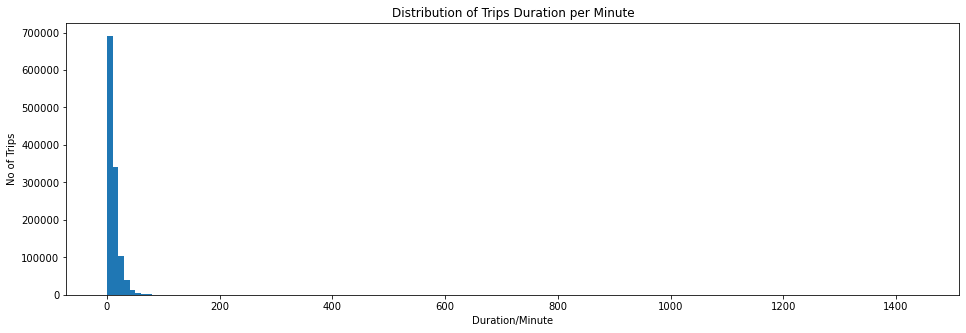

In [85]:
# start with trip duration histogram
binsize = 10
bins = np.arange(0, df_clean['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[16, 5])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.title('Distribution of Trips Duration per Minute')
plt.ylabel('No of Trips')
plt.xlabel('Duration/Minute')
plt.show()

In [86]:
# there's a long tail in the distribution
# it will be better to use log scale instead of normal

#Get the appropriate value for bins
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+log_binsize, log_binsize)
bins

array([1.00000000e+00, 1.25892541e+00, 1.58489319e+00, 1.99526231e+00,
       2.51188643e+00, 3.16227766e+00, 3.98107171e+00, 5.01187234e+00,
       6.30957344e+00, 7.94328235e+00, 1.00000000e+01, 1.25892541e+01,
       1.58489319e+01, 1.99526231e+01, 2.51188643e+01, 3.16227766e+01,
       3.98107171e+01, 5.01187234e+01, 6.30957344e+01, 7.94328235e+01,
       1.00000000e+02, 1.25892541e+02, 1.58489319e+02, 1.99526231e+02,
       2.51188643e+02, 3.16227766e+02, 3.98107171e+02, 5.01187234e+02,
       6.30957344e+02, 7.94328235e+02, 1.00000000e+03, 1.25892541e+03,
       1.58489319e+03])

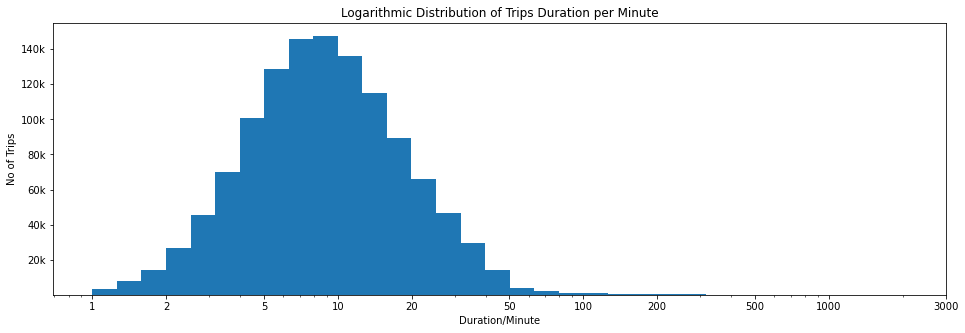

In [87]:
plt.figure(figsize=[16, 5])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xscale('log')
x_ticks = [1, 2, 5, 10, 20, 50, 1e2, 2e2, 5e2, 1e3, 3e3]
x_ticks_labels = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 3000]
y_ticks = [20000, 40000, 60000, 80000, 100000, 120000, 140000]
y_ticks_labels = ['20k', '40k', '60k', '80k', '100k', '120k', '140k']

plt.title('Logarithmic Distribution of Trips Duration per Minute')
plt.ylabel('No of Trips')
plt.xlabel('Duration/Minute')
plt.xticks( x_ticks, x_ticks_labels)
plt.yticks( y_ticks, y_ticks_labels)

plt.show()

> Most of the trips has low duration (less than 100 minute), for the trips with duration less than 100 minute, the distribuation is almost symmetric with peak value at 10 minute, so we can say that the no of trips increase with duration increased till we reach 10 minute duration, the no of trips starts to decrease with the duration increased.

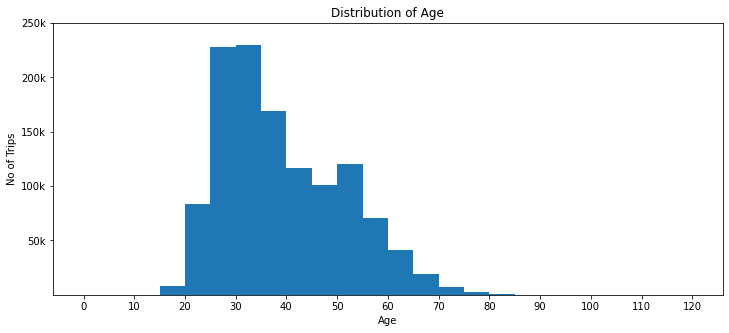

In [88]:
# let's now show how age distrubted
binsize = 5
bins = np.arange(0, df_clean['member_age'].max()+binsize, binsize)
x_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
y_ticks = [50000, 100000, 150000, 200000, 250000]
y_ticks_labels= ['50k', '100k', '150k', '200k', '250k']

plt.figure(figsize=[12, 5])
plt.hist(data = df_clean, x = 'member_age', bins = bins)

plt.title('Distribution of Age')
plt.ylabel('No of Trips')
plt.xlabel('Age')
plt.xticks(x_ticks)
plt.yticks(y_ticks, y_ticks_labels)
plt.show()

> Most of the ages between 20 and 80 years old, With peak value at age 30 the number of trips reach around 240k trip, the age of the contributers start from around 15 years old with very low number of trips between 15 to 20 and at 20 the no of trips jumps to above 50k trip then there is a big jump also between 25 and 30 years old and we reach peak no of trips at 30-35  then the no of trips starts to decrease with the age increaed and there is a jump between age 50-55

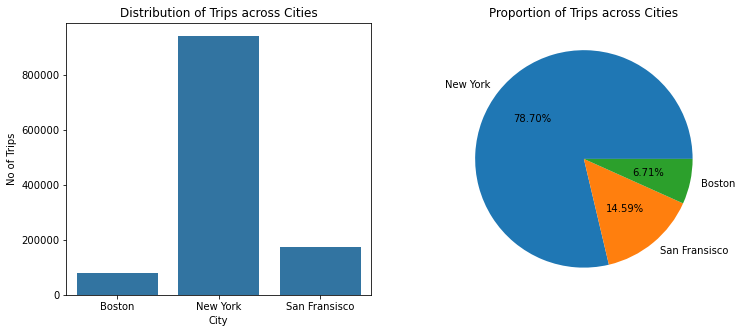

In [89]:
# let's now show no of trips in each city

plt.figure(figsize=[12, 5])

plt.subplot(1, 2, 1)
sb.countplot(data = df_clean, x = 'city', color = base_color)

plt.title('Distribution of Trips across Cities')
plt.ylabel('No of Trips')
plt.xlabel('City')


plt.subplot(1, 2, 2)
cities_values = df_clean['city'].value_counts()
plt.pie(cities_values, labels = cities_values.index, autopct='%1.2f%%')
plt.title('Proportion of Trips across Cities')

plt.show()

> The number of trips in New York City is very large compared to the number of trips in San Fransisco or Boston, New York City is the Largest No of trips with (78.7 %) from all trips then San Fransisco City with (14.59%) and the lowest number for Boston City with (6.71%)

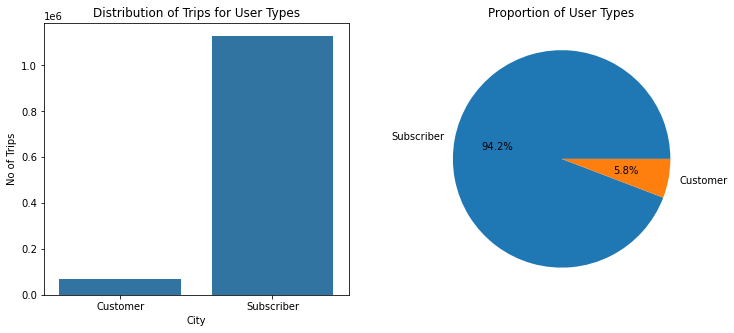

In [90]:
# let's now show no of trips in each user types

plt.figure(figsize=[12, 5])

plt.subplot(1, 2, 1)
sb.countplot(data = df_clean, x = 'user_type', color = base_color)

plt.title('Distribution of Trips for User Types')
plt.ylabel('No of Trips')
plt.xlabel('City')


plt.subplot(1, 2, 2)
users_values = df_clean['user_type'].value_counts()
plt.pie(users_values, labels = users_values.index, autopct='%1.1f%%')
plt.title('Proportion of User Types')

plt.show()

> Most of the users are subscribers as the subscribers number of trips exceeds 1 million with (94.2 %) from all trips, while the customers no of trips not reach 100k with (5.8%) from all trips

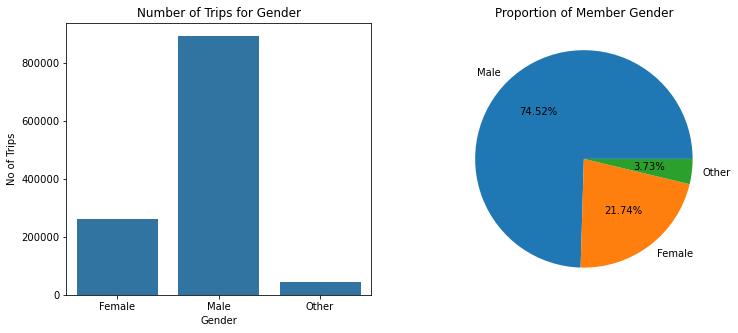

In [91]:
# let's now show no of trips in each gender

plt.figure(figsize=[12, 5])

plt.subplot(1, 2, 1)
sb.countplot(data = df_clean, x = 'member_gender', color = base_color)

plt.title('Number of Trips for Gender')
plt.ylabel('No of Trips')
plt.xlabel('Gender')


plt.subplot(1, 2, 2)
gender_values = df_clean['member_gender'].value_counts()
plt.pie(gender_values, labels = gender_values.index, autopct='%1.2f%%')
plt.title('Proportion of Member Gender')

plt.show()

> Most of the users are males as the males number of trips exceeds 900k with (74.52 %) from all trips, while the females not exceed 300k with (21.74 %) and Others are 3.73%

> The strange part here is the percentage of males around 3.5 times the percentage of females

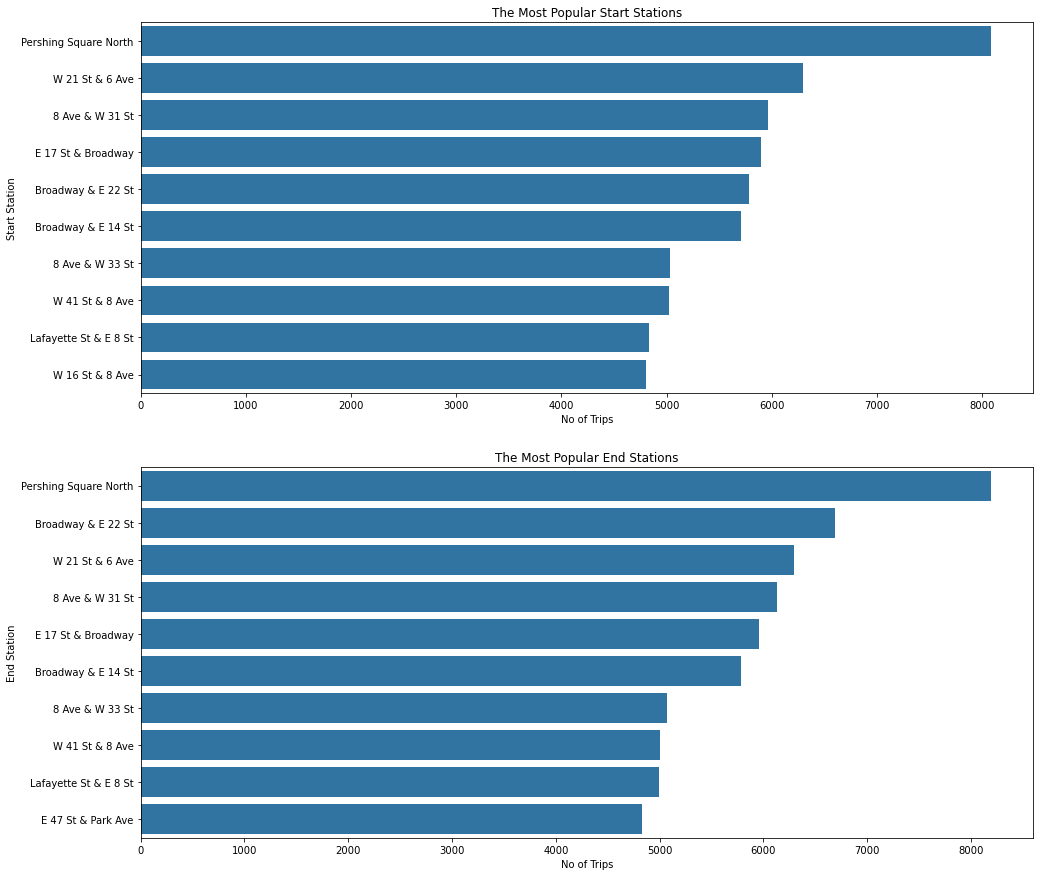

In [92]:
# let's now show The start stations and End Stations with highest no of trips 

plt.figure(figsize=[16, 15])

plt.subplot(2, 1, 1)
order_values_limit=df_clean['start_station_name'].value_counts().index[:10]
sb.countplot(data = df_clean, order= order_values_limit, y = 'start_station_name', color = base_color)

plt.title('The Most Popular Start Stations')
plt.ylabel('Start Station')
plt.xlabel('No of Trips')


plt.subplot(2, 1, 2)
order_values_limit=df_clean['end_station_name'].value_counts().index[:10]
sb.countplot(data = df_clean, order= order_values_limit, y = 'end_station_name', color = base_color)
plt.title('The Most Popular End Stations')
plt.xlabel('No of Trips')
plt.ylabel('End Station')

plt.show()

> The Pershing Square North station is the Station that has the largest no of trips start from and also the largest no of trips ending at, We also found that most of the stations in the highest no of trips start at also at the highest no of trips end at like W 21 St & 6 Ave station, 8 Ave & W 31 St station, E 17 St & Broadway station, Broadway & E 22 St station, Broadway & E 14 St station and so on. The start stations that has large no of trips are 'Pershing Square North', 'W 21 St & 6 Ave', '8 Ave & W 31 St','E 17 St & Broadway', 'Broadway & E 22 St', 'Broadway & E 14 St', '8 Ave & W 33 St', 'W 41 St & 8 Ave', 'Lafayette St & E 8 St', 'W 16 St & 8 Ave' with coresponding order.  The End stations that has large no of trips are 'Pershing Square North', 'Broadway & E 22 St', 'W 21 St & 6 Ave', '8 Ave & W 31 St', 'E 17 St & Broadway', 'Broadway & E 14 St', '8 Ave & W 33 St', 'W 41 St & 8 Ave', 'Lafayette St & E 8 St', 'E 47 St & Park Ave' with coresponding order.

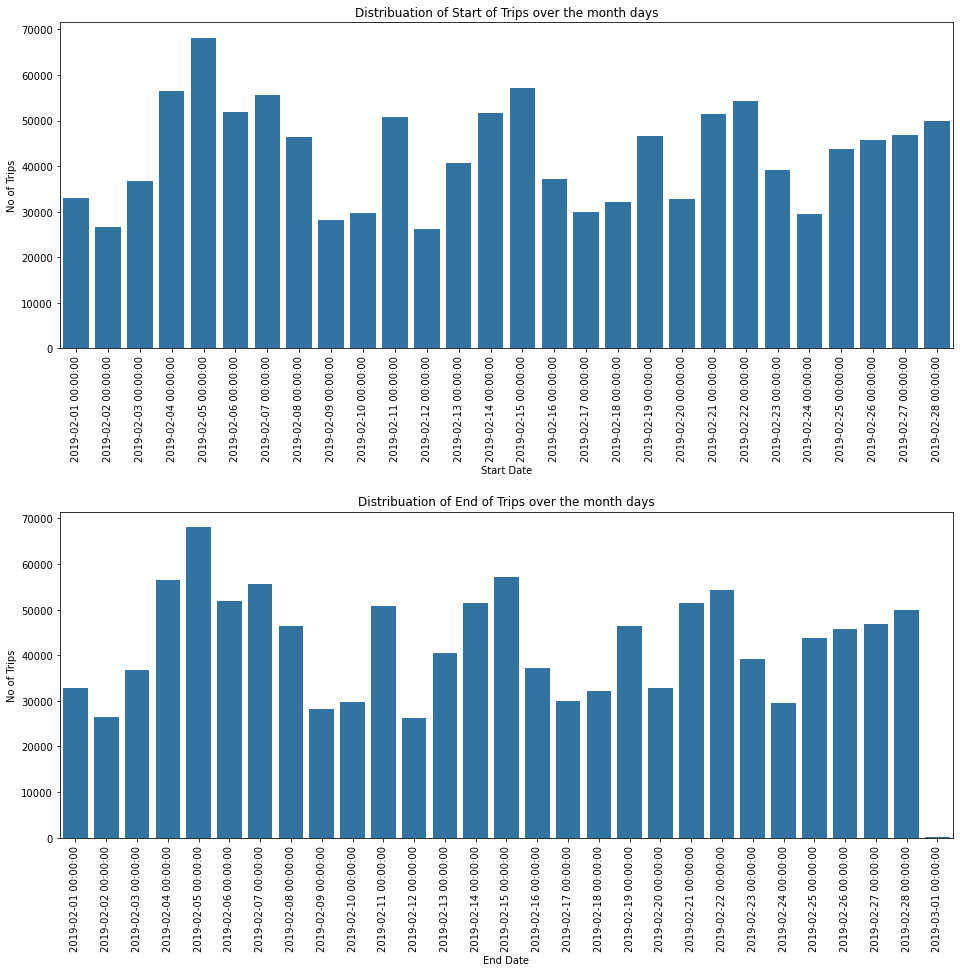

In [93]:
# let's now show The Distribution of no of trips over the start Date and End Date 

plt.figure(figsize=[16, 15])
plt.subplots_adjust(hspace=0.5)
plt.subplot(2, 1, 1)

sb.countplot(data = df_clean, x = 'start_date', color = base_color)
plt.title('Distribuation of Start of Trips over the month days')
plt.ylabel('No of Trips')
plt.xlabel('Start Date')
plt.xticks(rotation=90);

plt.subplot(2, 1, 2)
sb.countplot(data = df_clean, x = 'end_date', color = base_color)
plt.title('Distribuation of End of Trips over the month days')
plt.xlabel('End Date')
plt.ylabel('No of Trips')
plt.xticks(rotation=90);

plt.show()

> The distribuation of number of trips for the start date mostly like the distribuation of number of trips for the end date, some days have number of large no of trips around the double values of other days

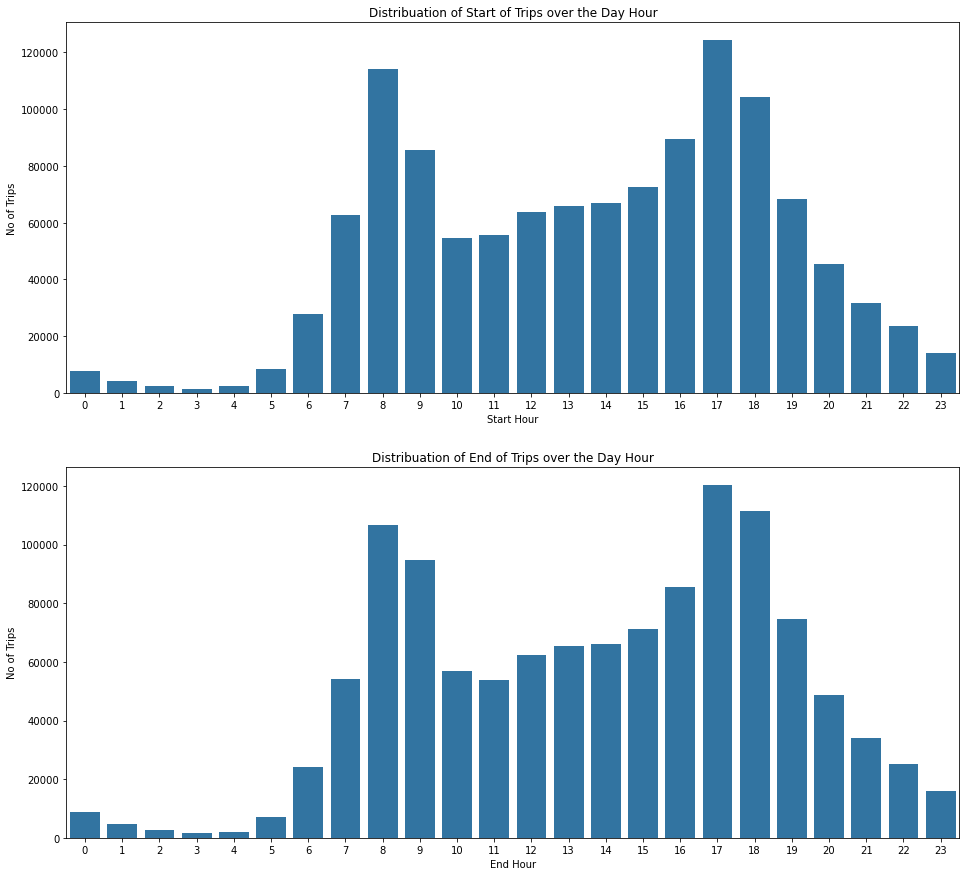

In [94]:
# let's now show The Distribution of no of trips over the Day Hour
plt.figure(figsize=[16, 15])
plt.subplot(2, 1, 1)

sb.countplot(data = df_clean, x = 'start_hour', color = base_color)
plt.title('Distribuation of Start of Trips over the Day Hour')
plt.ylabel('No of Trips')
plt.xlabel('Start Hour')


plt.subplot(2, 1, 2)
sb.countplot(data = df_clean, x = 'end_hour', color = base_color)
plt.title('Distribuation of End of Trips over the Day Hour')
plt.xlabel('End Hour')
plt.ylabel('No of Trips')

plt.show()

> The distribuation of number of trips for the start hour mostly like the distribuation of number of trips for the end hour.

> The peak values for the start hour and end hour around 8-9 AM and 5-6 PM and this is normal because this is the time people go to work and get back to home.

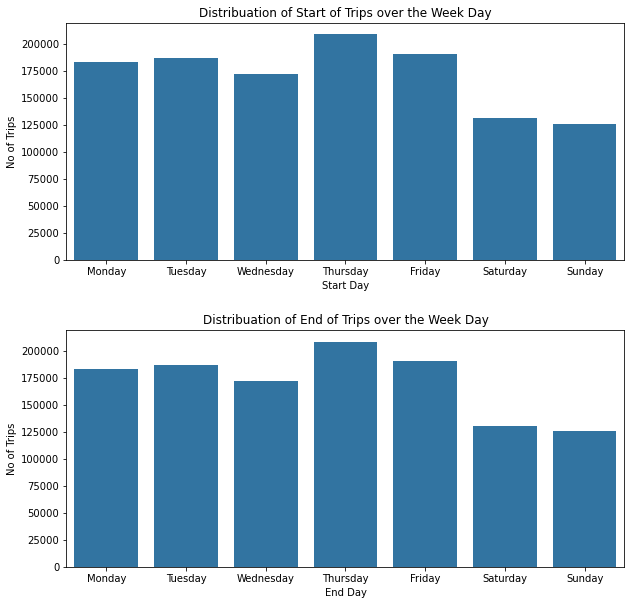

In [95]:
# let's now show The Distribution of no of trips over the Day of the week

plt.figure(figsize=[10, 10])
plt.subplot(2, 1, 1)
plt.subplots_adjust(hspace=0.3)
days_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

sb.countplot(data = df_clean, order=days_order ,x = 'start_day_of_Week', color = base_color)
plt.title('Distribuation of Start of Trips over the Week Day')
plt.ylabel('No of Trips')
plt.xlabel('Start Day')

plt.subplot(2, 1, 2)
sb.countplot(data = df_clean, order=days_order , x = 'end_day_of_Week', color = base_color)
plt.title('Distribuation of End of Trips over the Week Day')
plt.xlabel('End Day')
plt.ylabel('No of Trips')

plt.show()

> The Distribution of trips over the week days is normal the different between days not too much except for week end days (saturday and sunday) is less than the work days. 

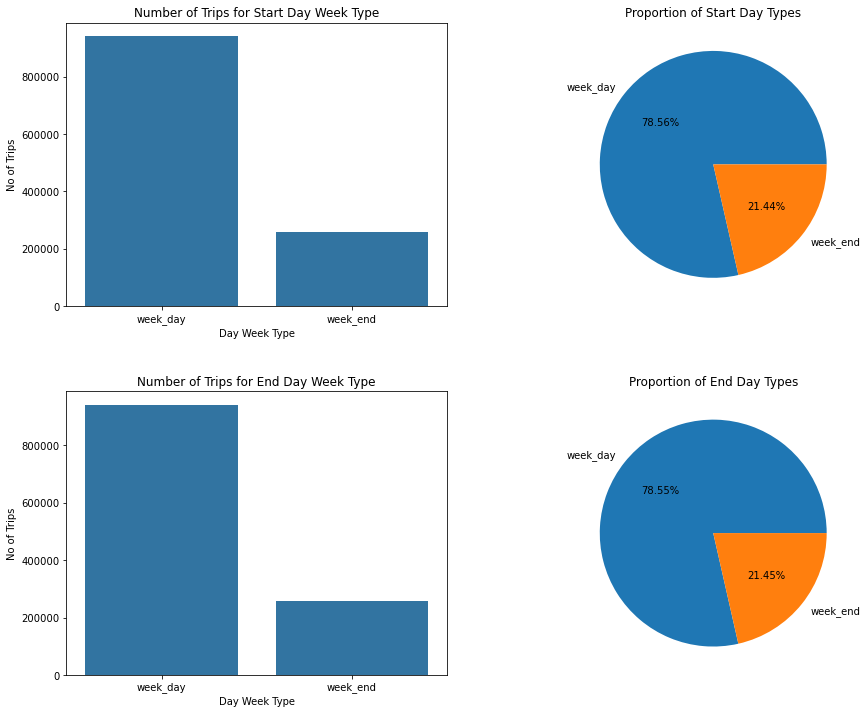

In [96]:
# let's now show no of trips in each day type (Week Day vs Week End )

plt.figure(figsize=[15, 12])
plt.subplots_adjust(hspace=0.3)
plt.subplot(2, 2, 1)
sb.countplot(data = df_clean, x = 'start_day_Week_type', color = base_color)

plt.title('Number of Trips for Start Day Week Type')
plt.ylabel('No of Trips')
plt.xlabel('Day Week Type')


plt.subplot(2, 2, 2)
day_type_values = df_clean['start_day_Week_type'].value_counts()
plt.pie(day_type_values, labels = day_type_values.index, autopct='%1.2f%%')
plt.title('Proportion of Start Day Types')

plt.subplot(2, 2, 3)
sb.countplot(data = df_clean, x = 'end_day_Week_type', color = base_color)

plt.title('Number of Trips for End Day Week Type')
plt.ylabel('No of Trips')
plt.xlabel('Day Week Type')


plt.subplot(2, 2, 4)
day_type_values = df_clean['end_day_Week_type'].value_counts()
plt.pie(day_type_values, labels = day_type_values.index, autopct='%1.2f%%')
plt.title('Proportion of End Day Types')

plt.show()

> The Distribution for the trips over the week day type start and end almost the same. The number of trips for week days around 900k (with percentage 78.55 %) which is larger than number of trips for week end around 250k (with percentage around 21.45 %), given that the no of week days 5 and no of week end days 2 it will still week day larger than week end

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of duration_min is right skewed with long tail in the large values, We perform log distribution of its values to find that its values below 100 minute almost symmetric with peak value at 10 minute. 

> The distribution for the city shows that New York City has very large value (around 4 times the values for the other two cities added together) compared to the other two cities San Francisisco and Boston. 

> The Distribution for the user type shows that the subscribers has very large numbers of trips (around 95% from all trips) compared to customers. 

> The Distribution of the age shows that most of the ages between 20 and 80 years old, With peak value at age 30. 

> The Distribution of the gender shows that the percentage of males around 74.52% and females around 21.74%

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There is astrange jump in the distribution of age in age 50. but we left it as may be this due to people get more aware to their health at age of retirement.

> The Distribution of the gender shows that the males number of trips around 4 times the number of trips for females which may be due to some females feels unsafe in riding bike.

## Bivariate Exploration

In [97]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198372 entries, 0 to 1207621
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   duration_min         1198372 non-null  float64 
 1   start_station_name   1198372 non-null  object  
 2   end_station_name     1198372 non-null  object  
 3   bike_id              1198372 non-null  object  
 4   user_type            1198372 non-null  category
 5   member_age           1198372 non-null  int64   
 6   member_gender        1198372 non-null  category
 7   city                 1198372 non-null  category
 8   start_date           1198372 non-null  category
 9   end_date             1198372 non-null  category
 10  start_day_of_Week    1198372 non-null  category
 11  end_day_of_Week      1198372 non-null  category
 12  start_day_Week_type  1198372 non-null  category
 13  end_day_Week_type    1198372 non-null  category
 14  start_hour           1198372 non-n

In [98]:
# Divide the columns in different lists
numeric_cols = ['duration_min', 'member_age', 'start_hour','end_hour']
numeric_cols_important = ['duration_min', 'member_age']
categoric_cols_important = ['user_type', 'member_gender','city']
categoric_cols_date= ['start_date','end_date','start_day_of_Week','end_day_of_Week','start_day_Week_type','end_day_Week_type']

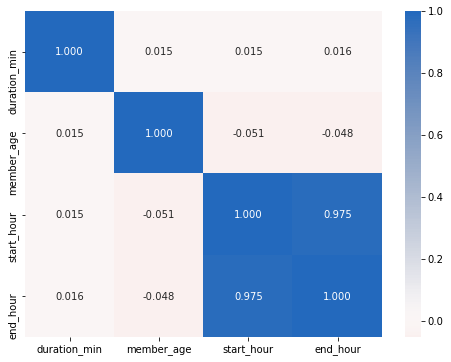

In [99]:
# lets now display the correlation between numeric variables using heatmap
plt.figure(figsize = [8, 6])
sb.heatmap(df_clean[numeric_cols].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

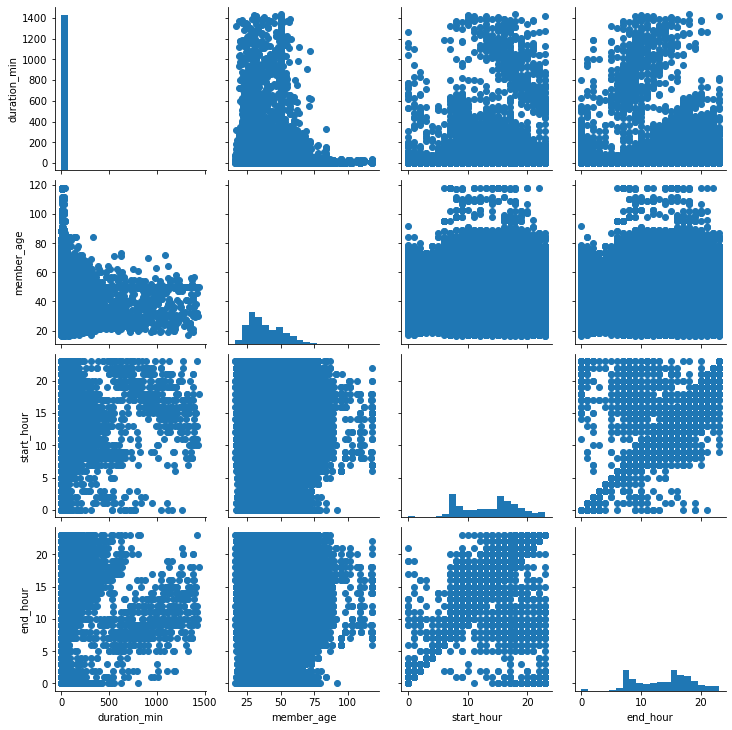

In [100]:
# To get more insight from numeric cols lets plot scatter plot betwwen them
# Due to the large number of data we will use sample 500 values so that plots are render faster
samples = np.random.choice(df_clean.shape[0], 500, replace = False)
df_clean_samp = df_clean.iloc[samples,:]

g = sb.PairGrid(data = df_clean, vars = numeric_cols)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

> From the above graph, we can conclude that there is a strong coorelation between start_hour and end_hour, the relation between duration and age not clear here so we will have closer look later on.

/home/amira/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 576x576 with 0 Axes>

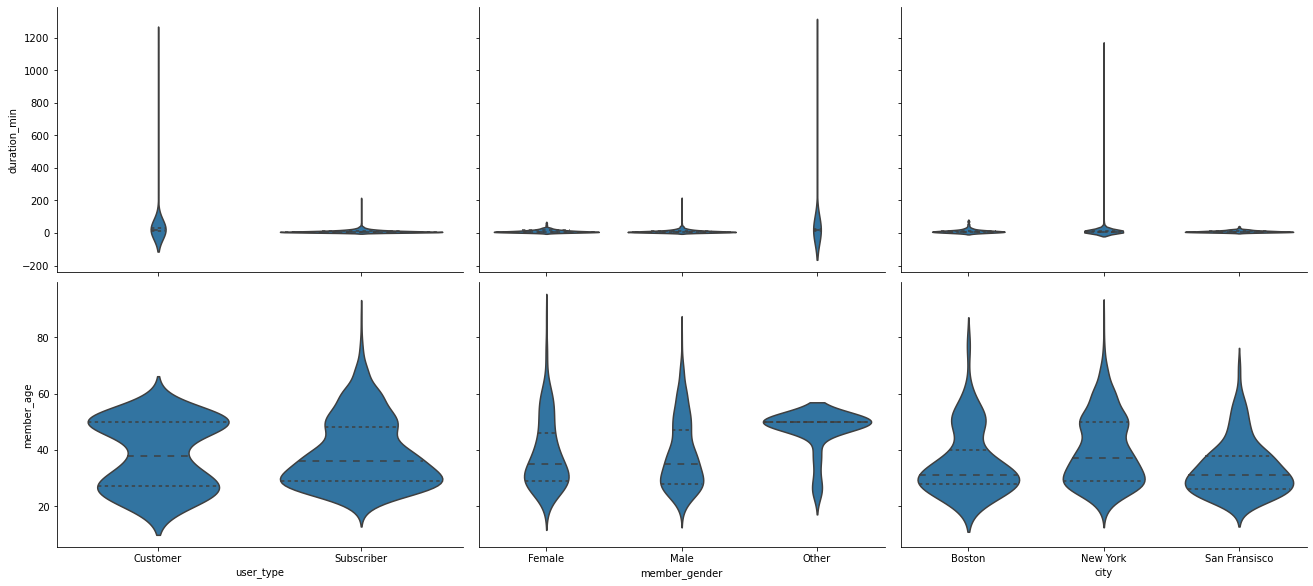

In [101]:
# plot matrix of numeric important features against important categorical features.

samples = np.random.choice(df_clean.shape[0], 1000, replace = False)
df_clean_samples = df_clean.iloc[samples,:]

def boxgrid(x, y, **kwargs):
    sb.boxplot(x, y, color = base_color)

plt.figure(figsize = [8, 8])
graph = sb.PairGrid(data = df_clean_samples, y_vars = numeric_cols_important, x_vars = categoric_cols_important, 
                    size = 4, aspect = 1.5)
graph.map(sb.violinplot, inner = 'quartile' )
plt.show();

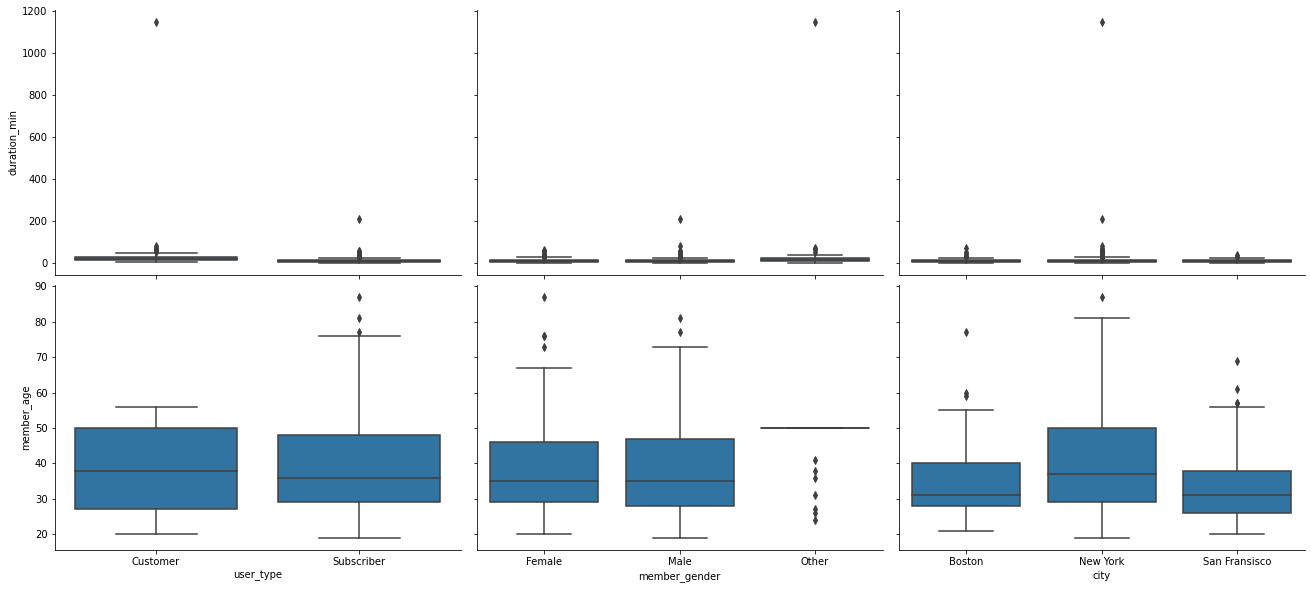

In [102]:
graph2 = sb.PairGrid(data = df_clean_samples, y_vars = numeric_cols_important, x_vars = categoric_cols_important, 
                    size = 4, aspect = 1.5)
graph2.map(boxgrid)
plt.show();

> The customer user type trip duration larger than the subscriber, The females trip duration slightly larger than males, The People in poston spend more on trip than the people in New York than the people in San Fransisco.

> The customers age is slightly larger than subscribers,  The males and female age approximatly the same or males slightly large. The people in New York is older than people in San Fransisco older than people in Boston.

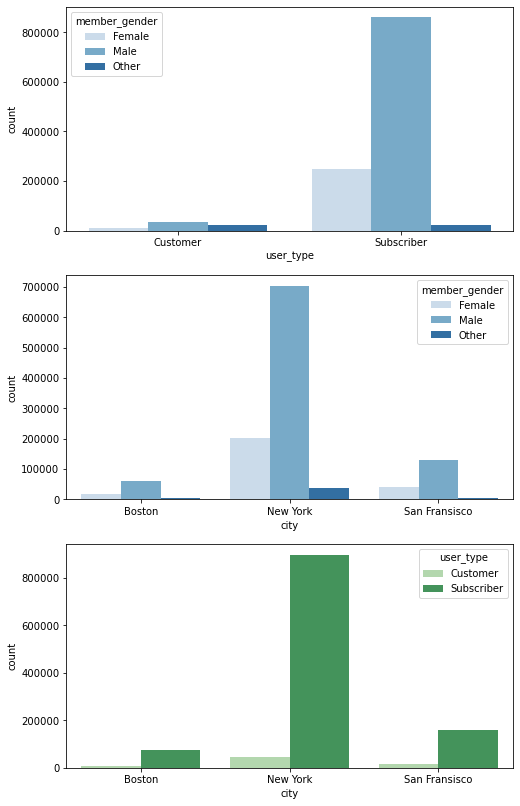

In [103]:
# let's display the important categorical feature together
plt.figure(figsize = [8, 14])

# subplot 1: display user type and member gender
plt.subplot(3, 1, 1)
sb.countplot(data = df_clean, x = 'user_type', hue = 'member_gender', palette = 'Blues')

# subplot 2: display city and member gender
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_clean, x = 'city', hue = 'member_gender', palette = 'Blues')

# subplot 3: display city and user type
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_clean, x = 'city', hue = 'user_type', palette = 'Greens')

plt.show()

> The number of trips for the user type not affected by the other values like gender and city , it showed same distribution which is the value for subscriber is so high with respect to the value for the customer with any city or gender.

> The gender also not affected by othe values, it also showed large value for males with respect to females for any user type or city.

> The value for city also the same like the other two categorical values not affected by the other feature and shwed large number for New York with respect to San Fransisco and Boston with any user type or gender.

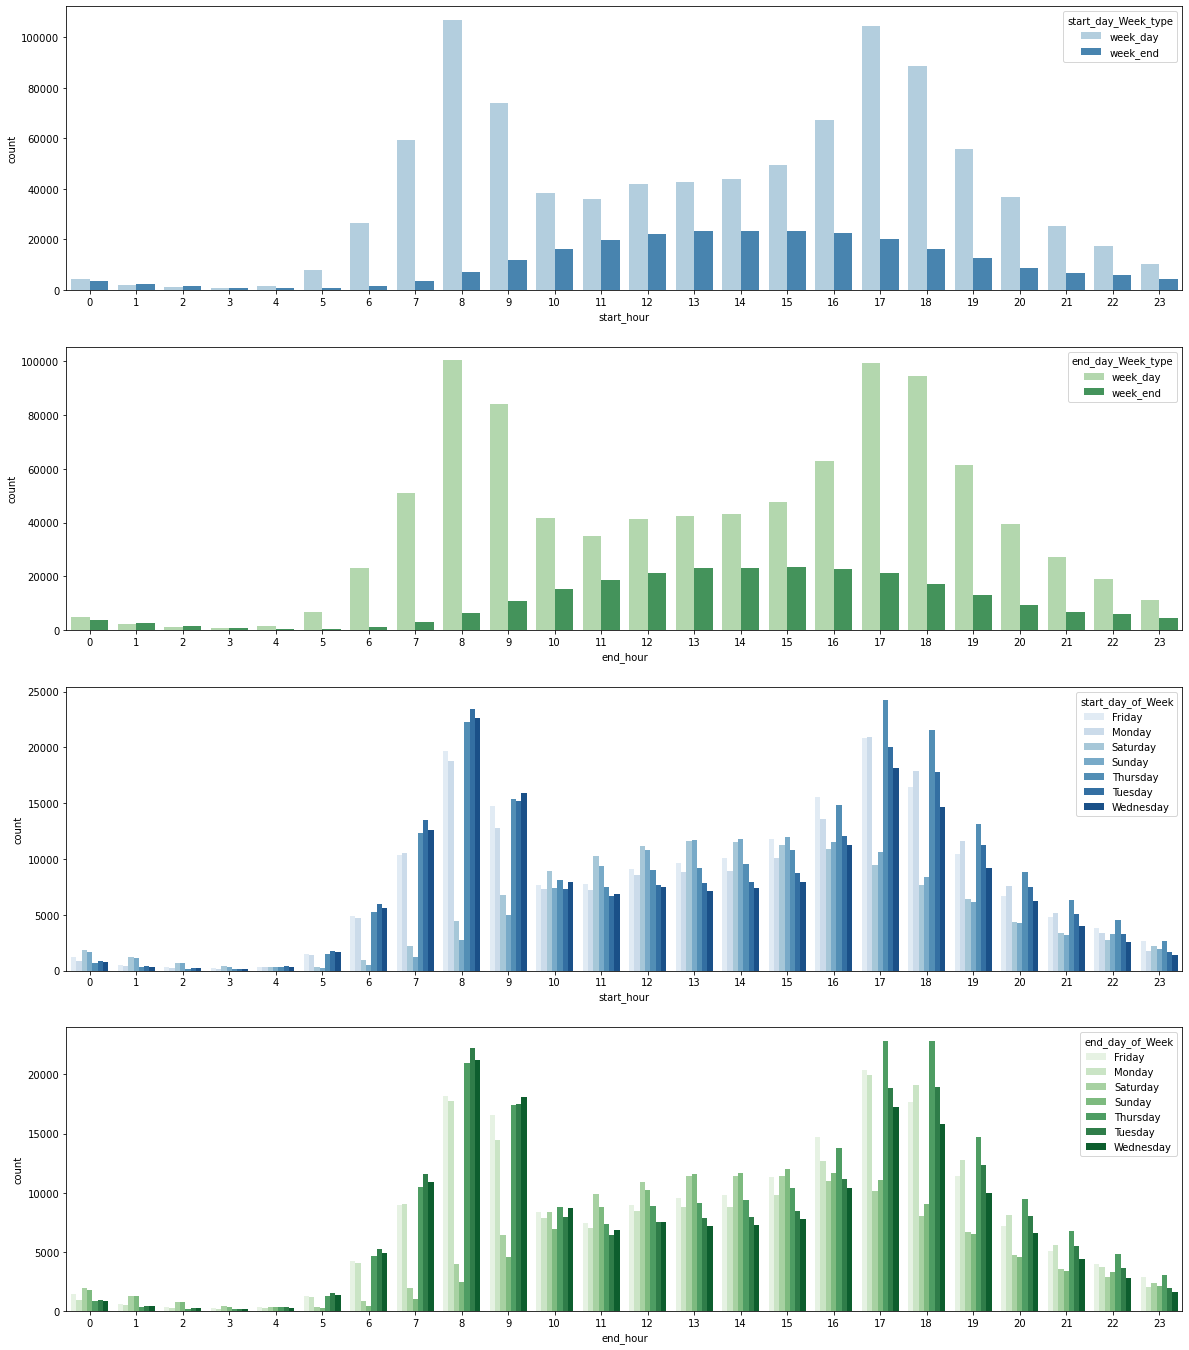

In [104]:
# let's display some of the date features together 
# (start_hour, start_day_Week_type) (end_hour, end_day_week_type)
# (start_hour, start_day_Week) (end_hour, end_day_week)
plt.figure(figsize = [20, 24])

# subplot 1: display start_hour, start_day_Week_type
plt.subplot(4, 1, 1)
sb.countplot(data = df_clean, x = 'start_hour', hue = 'start_day_Week_type', palette = 'Blues')


# subplot 2: display end_hour, end_day_week_type
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df_clean, x = 'end_hour', hue = 'end_day_Week_type', palette = 'Greens')

# subplot 3: display start_hour, start_day_Week_type
plt.subplot(4, 1, 3)
sb.countplot(data = df_clean, x = 'start_hour', hue = 'start_day_of_Week', palette = 'Blues')


# subplot 4: display end_hour, end_day_week_type
ax = plt.subplot(4, 1, 4)
sb.countplot(data = df_clean, x = 'end_hour', hue = 'end_day_of_Week', palette = 'Greens')

plt.show()


> From The above Distribution we can find that the distribution for end hour and start hour are approximetly the same just like we found previously. But here it provides more details that the peak hour for the week end different from the peak hour in the week days, for the week days the peak hours 8-9 AM and 5-6 PM and for the week end days from 1 PM and 3PM.

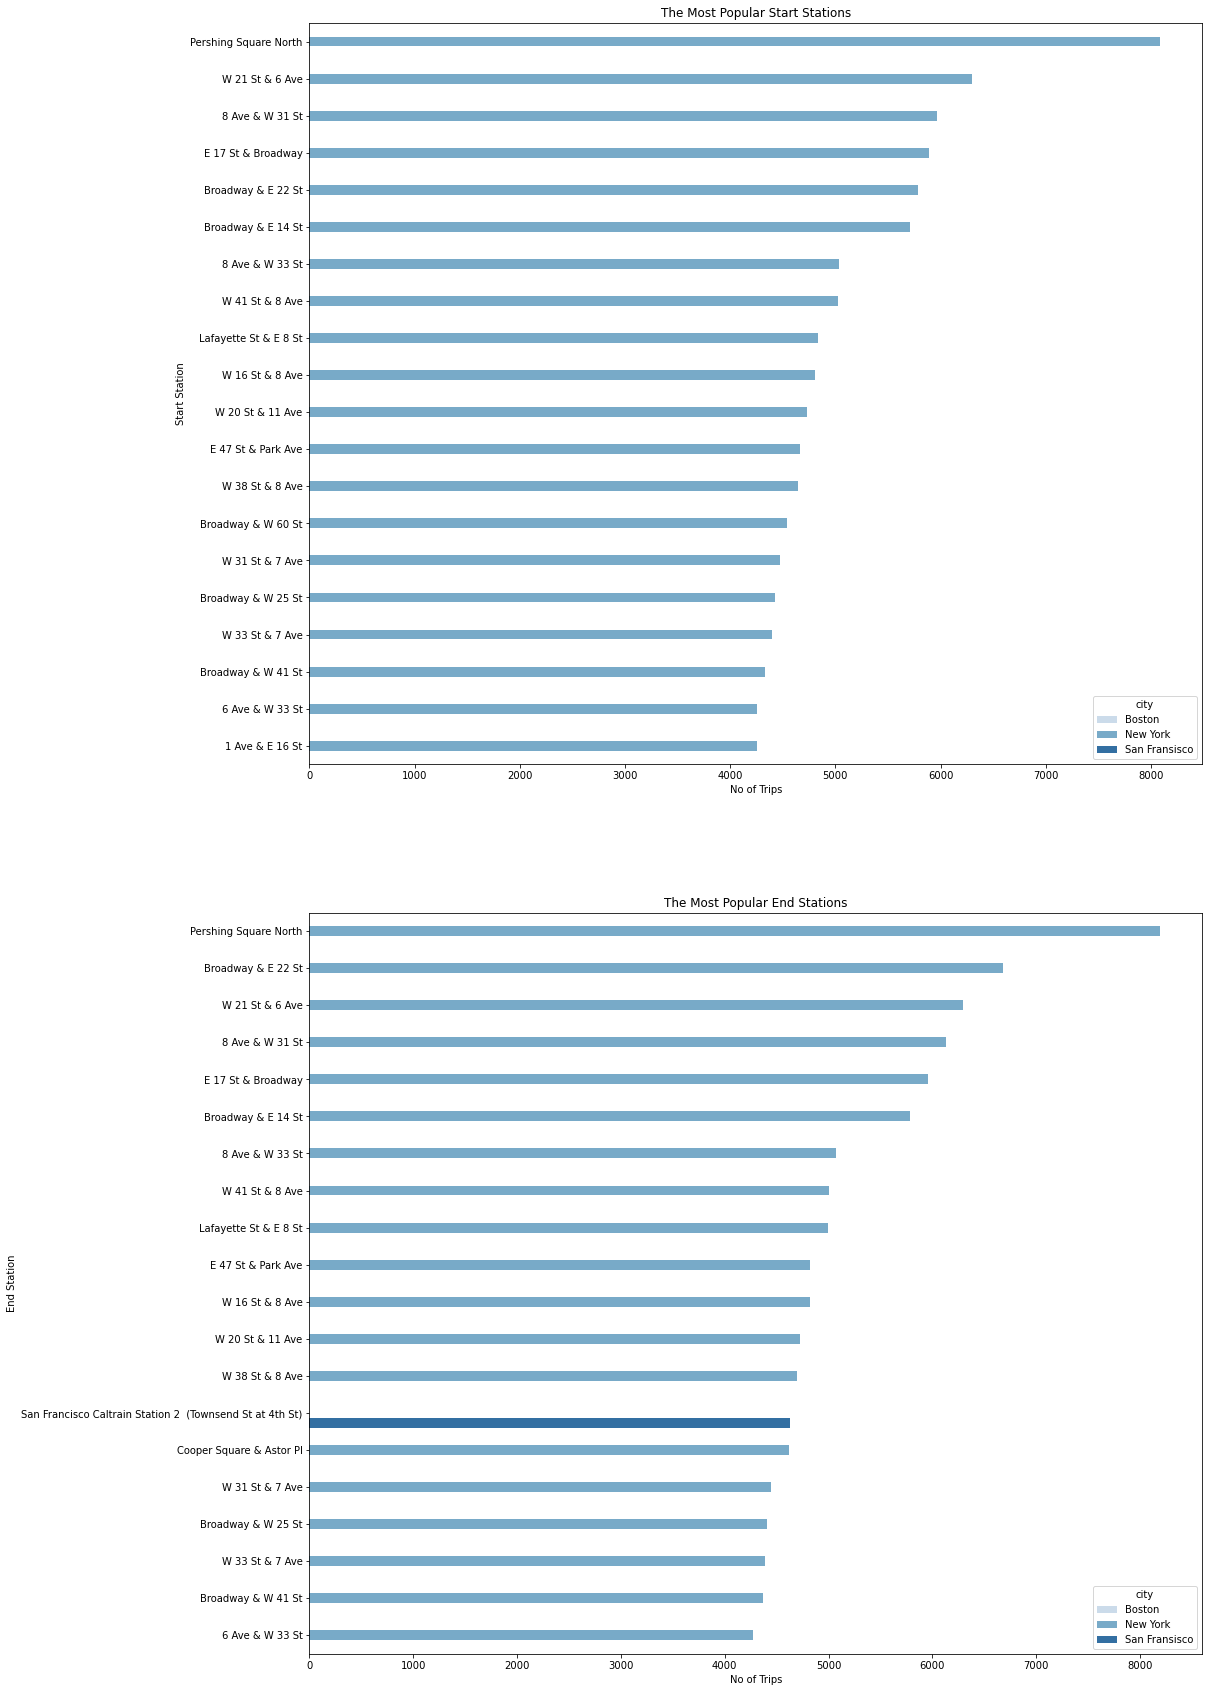

In [105]:
# let's now show The start stations and End Stations with highest no of trips with the city they are coresponding to.

plt.figure(figsize=[16, 30])

plt.subplot(2, 1, 1)
order_values_limit=df_clean['start_station_name'].value_counts().index[:20]
sb.countplot(data = df_clean, order= order_values_limit, y = 'start_station_name',hue='city',  palette = 'Blues')

plt.title('The Most Popular Start Stations')
plt.ylabel('Start Station')
plt.xlabel('No of Trips')


plt.subplot(2, 1, 2)
order_values_limit=df_clean['end_station_name'].value_counts().index[:20]
sb.countplot(data = df_clean, order= order_values_limit, y = 'end_station_name', hue='city',  palette = 'Blues')
plt.title('The Most Popular End Stations')
plt.xlabel('No of Trips')
plt.ylabel('End Station')

plt.show()

> From the graph we found that all start and end stations with the 20 highest number of trips in the New York City except san francisco caltrain station 2 in the San Fransisco city

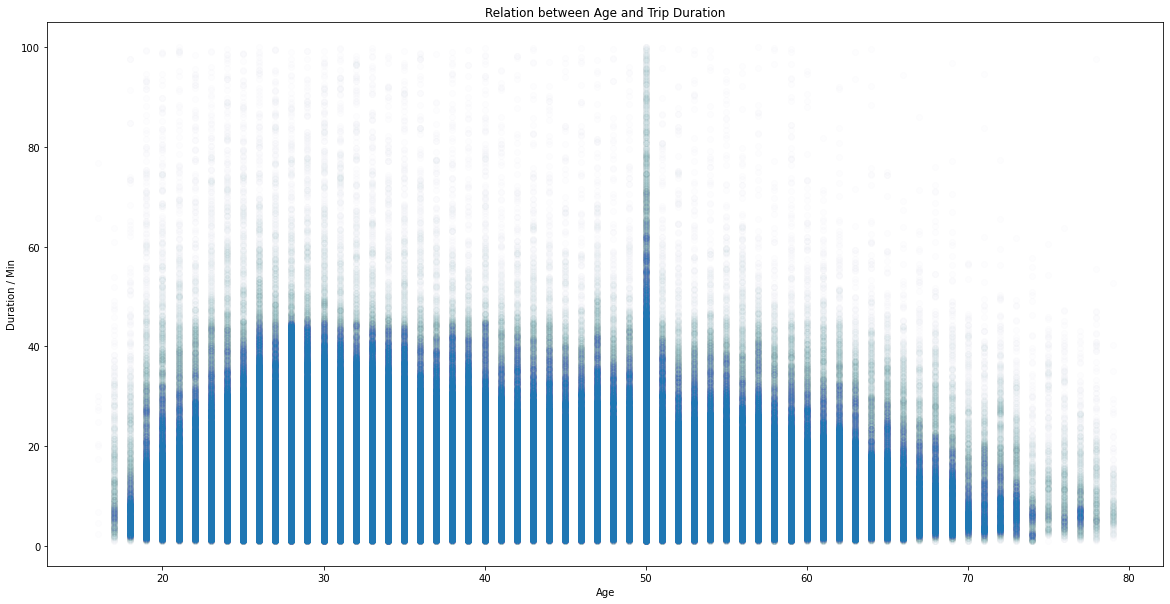

In [106]:
# let's get closer look in the relation between and duration and age feature
# First Limit the duration to get closer look
df_clean_time_age_limit = df_clean.query('duration_min < 100 and member_age < 80')

plt.figure(figsize = [20, 10])
plt.scatter(data = df_clean_time_age_limit, x = 'member_age', y = 'duration_min', alpha = 0.007)
plt.title('Relation between Age and Trip Duration')
plt.xlabel('Age')
plt.ylabel('Duration / Min')
plt.show()

> The Distribution of age with respect to duration shows that the duration increase with age increase till age 30 which is the peak then the duration decrease as the age increase but as we found previous there is jump in graph at age 50.

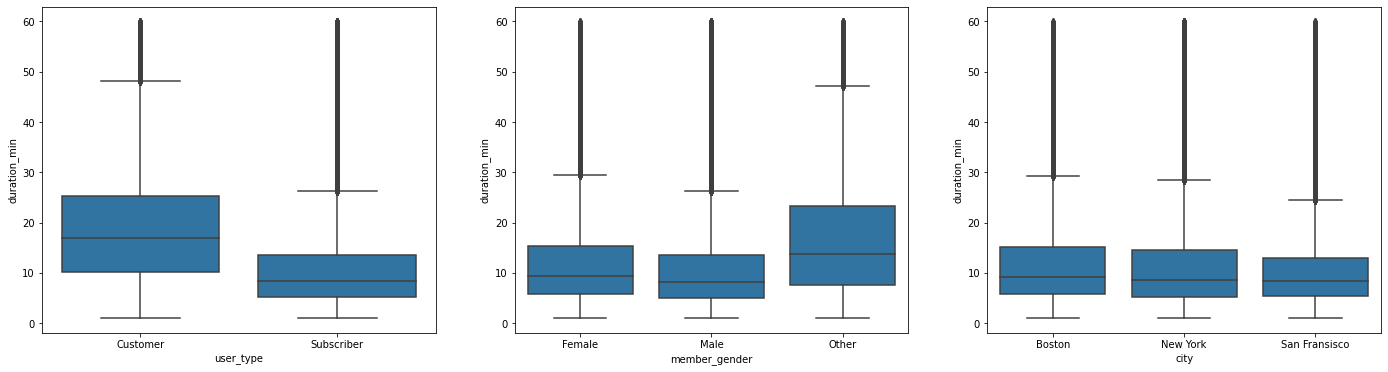

In [107]:
# let's get closer look in the relation between and duration important categorical features
# First Limit the duration to get closer look
df_clean_duration = df_clean.query('duration_min < 60')

plt.figure(figsize=[24, 6])
plt.subplot(1, 3, 1)
sb.boxplot(data = df_clean_duration, x = 'user_type',  y = 'duration_min', color = base_color)

plt.subplot(1, 3, 2)
sb.boxplot(data = df_clean_duration, x = 'member_gender',  y = 'duration_min', color = base_color)

plt.subplot(1, 3, 3)
sb.boxplot(data = df_clean_duration, x = 'city',  y = 'duration_min', color = base_color)
plt.show()

> For Closer look at the mean duration per minute with respect to (user type, city and gender), we found that the trip duration for customer larger than subscriber, the trip duration for females larger than males, the trip duration for people in Boston larger than New York larger than San Fransisco

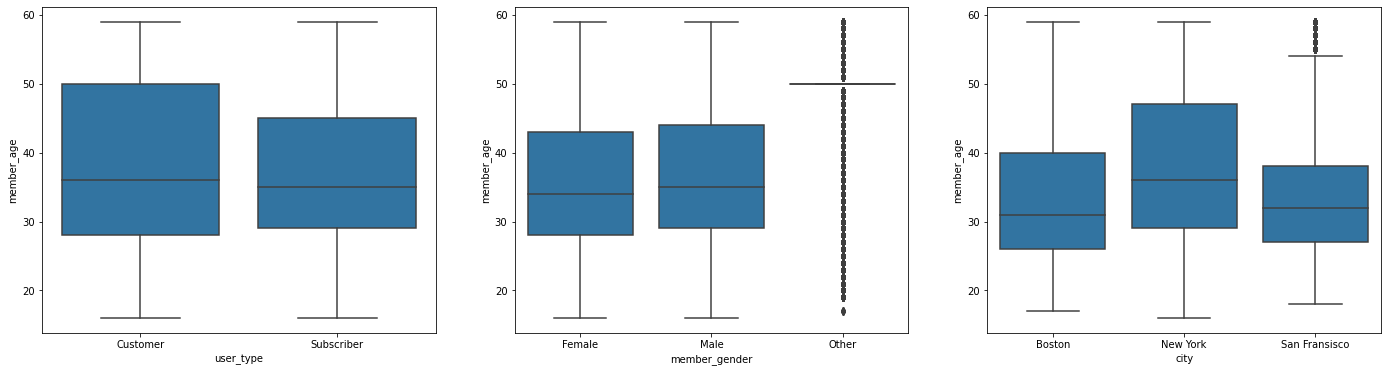

In [108]:
# let's get closer look in the relation between and age important categorical features
# First Limit the age to get closer look
df_clean_age_limit = df_clean.query('member_age < 60')

plt.figure(figsize=[24, 6])
plt.subplot(1, 3, 1)
sb.boxplot(data = df_clean_age_limit, x = 'user_type',  y = 'member_age', color = base_color)

plt.subplot(1, 3, 2)
sb.boxplot(data = df_clean_age_limit, x = 'member_gender',  y = 'member_age', color = base_color)

plt.subplot(1, 3, 3)
sb.boxplot(data = df_clean_age_limit, x = 'city',  y = 'member_age', color = base_color)
plt.show()

> By closer look at the age distribution with respect to (user type , city and gender), we found that the customer ages larger than the subscriber, the male ages larger than females, the New York People age larger than San Fransisco larger than Boston.

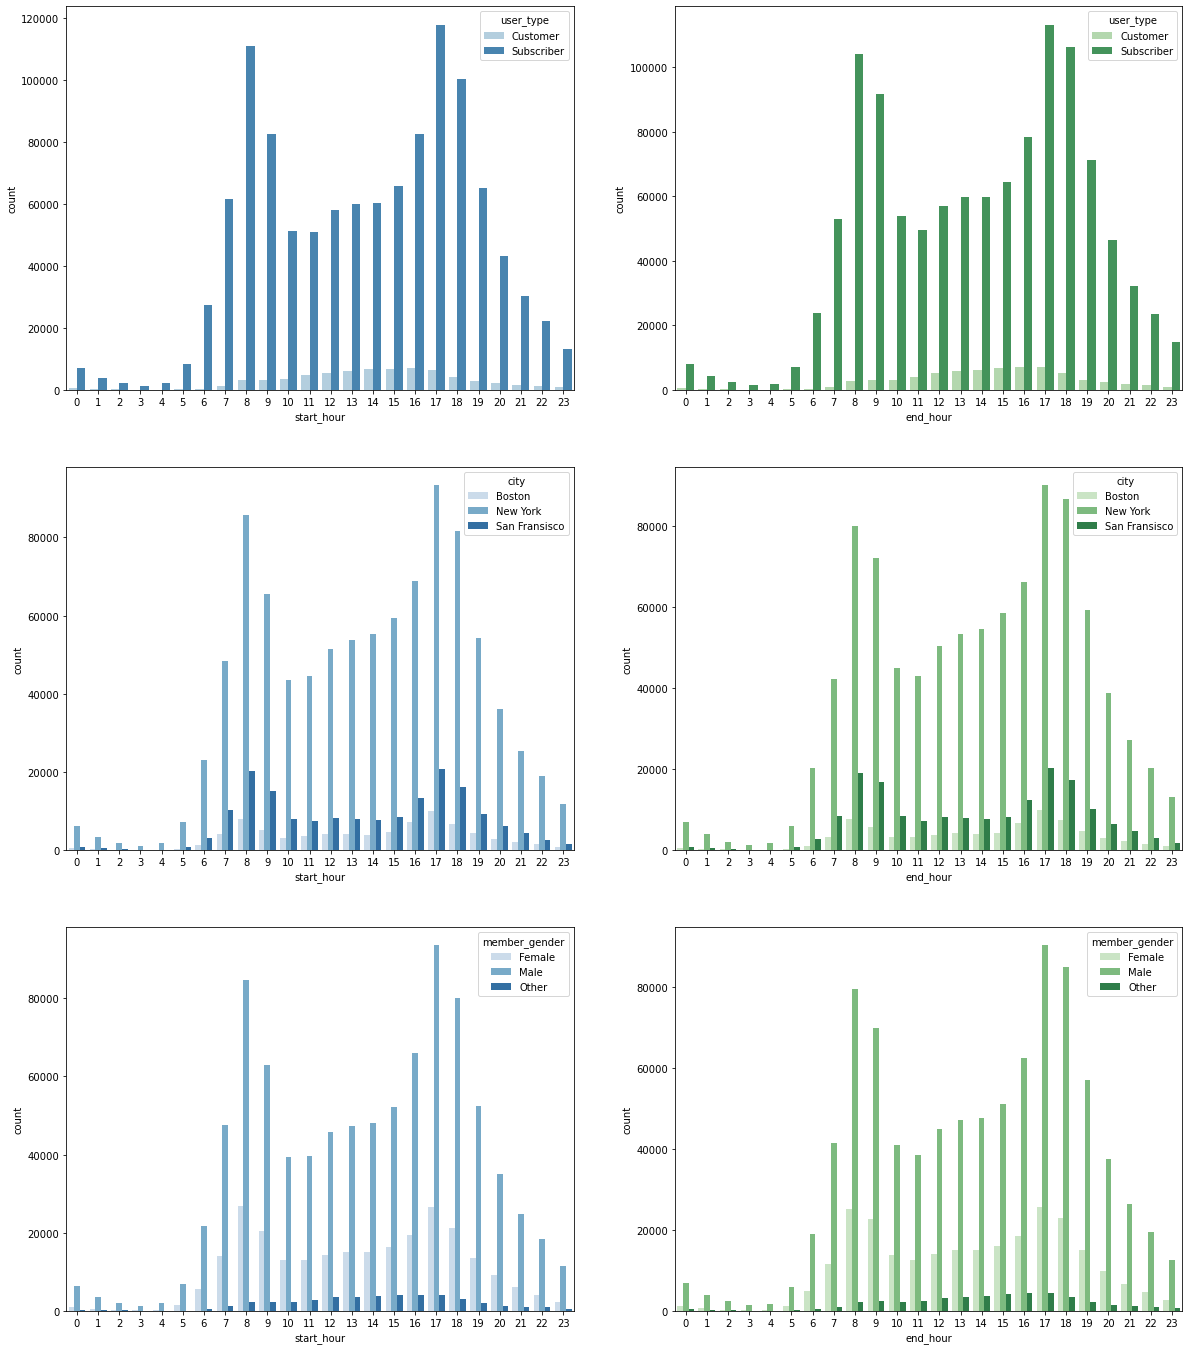

In [109]:
# let's display some of the date features with respect to the important categories features
# (start_hour, user_type) (end_hour, user_type)
# (start_hour, city) (end_hour, city)
# (start_hour, member_gender) (end_hour, member_gender)
plt.figure(figsize = [20, 24])

# subplot 1: display start_hour, user_type
plt.subplot(3, 2, 1)
sb.countplot(data = df_clean, x = 'start_hour', hue = 'user_type', palette = 'Blues')


# subplot 2: display end_hour, user_type
ax = plt.subplot(3, 2, 2)
sb.countplot(data = df_clean, x = 'end_hour', hue = 'user_type', palette = 'Greens')

# subplot 3: display start_hour, city
plt.subplot(3, 2, 3)
sb.countplot(data = df_clean, x = 'start_hour', hue = 'city', palette = 'Blues')


# subplot 4: display end_hour, city
ax = plt.subplot(3, 2, 4)
sb.countplot(data = df_clean, x = 'end_hour', hue = 'city', palette = 'Greens')

# subplot 5: display start_hour, member_gender
plt.subplot(3, 2, 5)
sb.countplot(data = df_clean, x = 'start_hour', hue = 'member_gender', palette = 'Blues')


# subplot 4: display end_hour, member_gender
ax = plt.subplot(3, 2, 6)
sb.countplot(data = df_clean, x = 'end_hour', hue = 'member_gender', palette = 'Greens')

plt.show()


> The start and end hour affected by the type of user, it provides more details that the peak hour for subscriber different from the peak hour in the customer, for the subscriber the peak hours 8-9 AM and 5-6 PM and for the customer from 3 PM and 5PM.

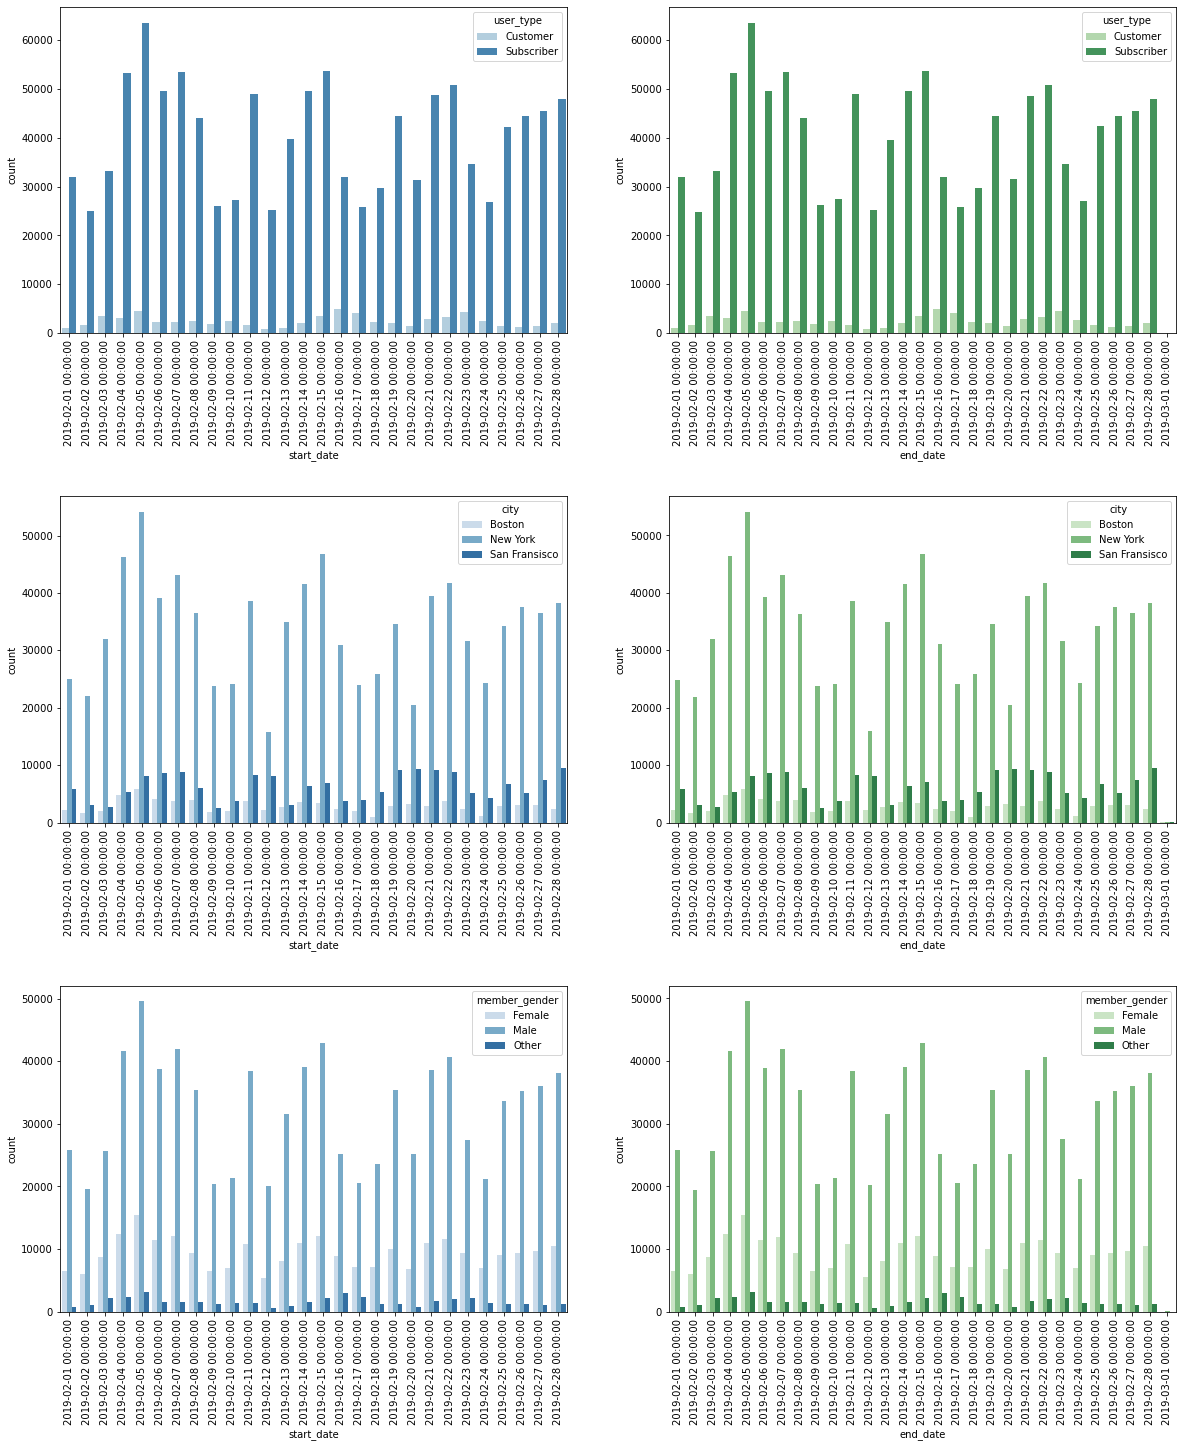

In [110]:
# let's display some of the date features with respect to the important categories features
# (start_date, user_type) (end_date, user_type)
# (start_date, city) (end_date, city)
# (start_date, member_gender) (end_date, member_gender)
plt.figure(figsize = [20, 24])
plt.subplots_adjust(hspace=0.5)
# subplot 1: display start_date, user_type
plt.subplot(3, 2, 1)
sb.countplot(data = df_clean, x = 'start_date', hue = 'user_type', palette = 'Blues')
plt.xticks(rotation=90);

# subplot 2: display end_date, user_type
ax = plt.subplot(3, 2, 2)
sb.countplot(data = df_clean, x = 'end_date', hue = 'user_type', palette = 'Greens')
plt.xticks(rotation=90);

# subplot 3: display start_date, city
plt.subplot(3, 2, 3)
sb.countplot(data = df_clean, x = 'start_date', hue = 'city', palette = 'Blues')
plt.xticks(rotation=90);

# subplot 4: display end_date, city
ax = plt.subplot(3, 2, 4)
sb.countplot(data = df_clean, x = 'end_date', hue = 'city', palette = 'Greens')
plt.xticks(rotation=90);

# subplot 5: display start_date, member_gender
plt.subplot(3, 2, 5)
sb.countplot(data = df_clean, x = 'start_date', hue = 'member_gender', palette = 'Blues')
plt.xticks(rotation=90);

# subplot 4: display end_date, member_gender
ax = plt.subplot(3, 2, 6)
sb.countplot(data = df_clean, x = 'end_date', hue = 'member_gender', palette = 'Greens')
plt.xticks(rotation=90);

plt.show()


> The Distribution for the start and end date are same and didn't affect by other features like user type, gender and city.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip Duration feature vary with other features (city, user type and gender): The customer user type trip duration larger than the subscriber, The females trip duration slightly larger than males, The People in poston spend more on trip than the people in New York than the people in San Fransisco.

> The user age feature vary with other features (city, user type and gender): The customers age is slightly larger than subscribers, The males and female age approximatly the same or males slightly large. The people in New York is older than people in San Fransisco older than people in Boston.

> The user type vs (start or end hour) : The peak hour for subscriber different from the peak hour in the customer, for the subscriber the peak hours 8-9 AM and 5-6 PM and for the customer from 3 PM and 5PM.

> Week Day Type vs (start or end hour): The distribution for end hour and start hour shows that the peak hour for the week end different from the peak hour in the week days, for the week days the peak hours 8-9 AM and 5-6 PM and for the week end days from 1 PM and 3PM.

> The city vs end station: All end stations with the 20 highest number of trips in the New York City except san francisco caltrain station 2 in the end stations in the San Fransisco city.

> The age vs the trip duration : The Distribution of age with respect to duration shows that the duration increase with age increase till age 30 which is the peak then the duration decrease as the age increase.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration

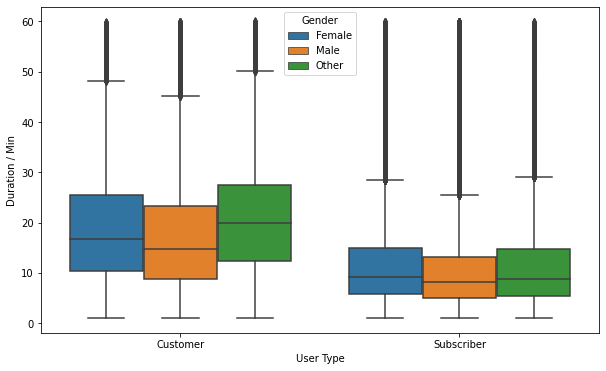

In [111]:
# let's get the relation between duration , member_gender, user type
plt.figure(figsize=[10, 6])
sb.boxplot(data = df_clean_duration, x = 'user_type',  y = 'duration_min', hue='member_gender')
plt.legend(title="Gender")
plt.xlabel("User Type")
plt.ylabel("Duration / Min")
plt.show()

> The female customers spend more time in the trip than female subscribers and the same for males.

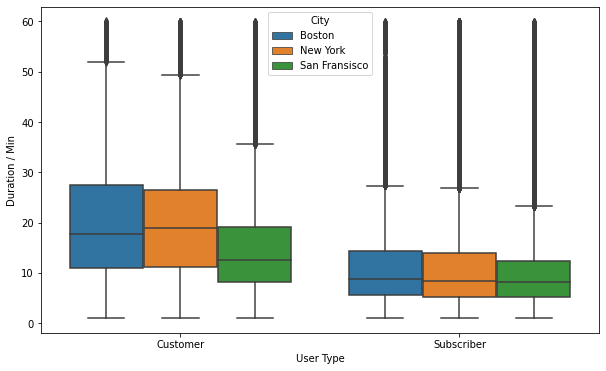

In [112]:
# let's get the relation between duration, city, user type
plt.figure(figsize=[10, 6])
sb.boxplot(data = df_clean_duration, x = 'user_type',  y = 'duration_min', hue='city')
plt.legend(title="City")
plt.xlabel("User Type")
plt.ylabel("Duration / Min")
plt.show()

> The Customers in New York spend more time than the customers in Boston than the customers in San Fransisco, but for the subscribers the duration is almost the same for all members regardless the city.

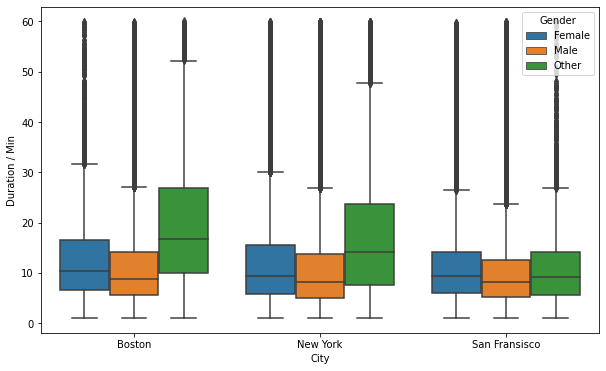

In [113]:
# let's get the relation between duration , city, gender
plt.figure(figsize=[10, 6])
sb.boxplot(data = df_clean_duration, x = 'city',  y = 'duration_min', hue='member_gender')
plt.legend(loc ='upper right', title="Gender")
plt.xlabel("City")
plt.ylabel("Duration / Min")
plt.show()

> The female in Boston spend more time in the trip than in New York than in San Fransisco and the same for males.

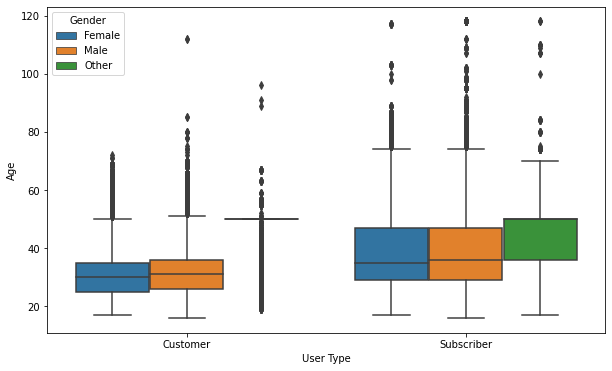

In [114]:
# let's get the relation between age , member_gender, user type
plt.figure(figsize=[10, 6])
sb.boxplot(data = df_clean_duration, x = 'user_type',  y = 'member_age', hue='member_gender')
plt.legend(title="Gender")
plt.xlabel("User Type")
plt.ylabel("Age")
plt.show()

> The Male subscriber are older than the male customer and the same for female

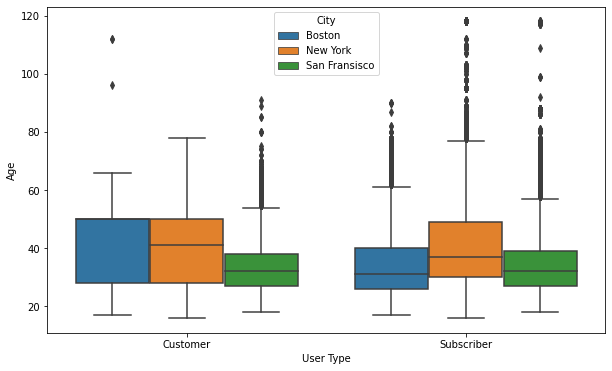

In [115]:
# let's get the relation between age, city, user type
plt.figure(figsize=[10, 6])
sb.boxplot(data = df_clean_duration, x = 'user_type',  y = 'member_age', hue='city')
plt.legend(title="City")
plt.xlabel("User Type")
plt.ylabel("Age")
plt.show()

> Customers in New York are older than Subscriber in New York, and so on for other cities. 

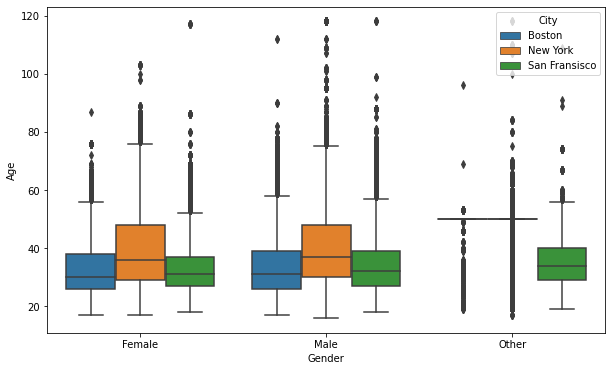

In [116]:
# let's get the relation between age, city, gender
plt.figure(figsize=[10, 6])
sb.boxplot(data = df_clean_duration, x = 'member_gender',  y = 'member_age', hue='city')
plt.legend(loc ='upper right', title="City")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

> Males are older than female and the city didn't affect that.

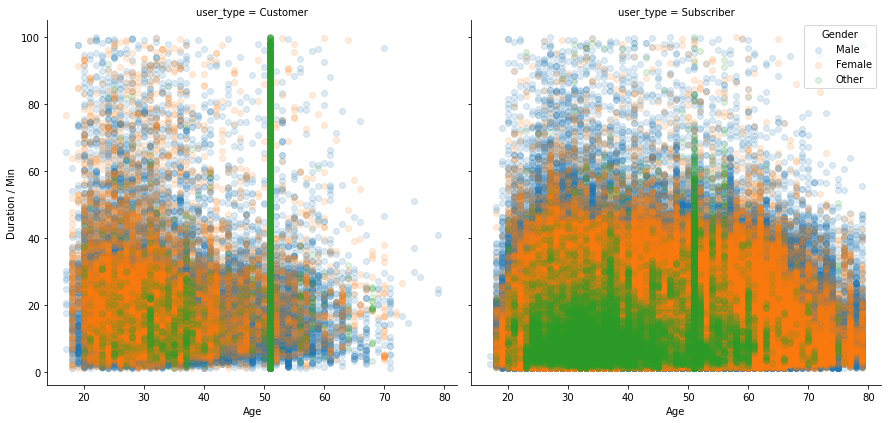

In [117]:
# let's display the relation between duration, age, user type, gender feature
# create faceted heat maps on the user type variable
graph = sb.FacetGrid(data = df_clean_time_age_limit, col = 'user_type', hue='member_gender',hue_order=['Male','Female','Other'], col_wrap = 6, size = 6)
graph.map(plt.scatter, 'member_age', 'duration_min', alpha=0.15)
graph.set_xlabels('Age')
graph.set_ylabels('Duration / Min')
plt.legend(title="Gender")
plt.show()

> The graph shows that the subscribers are older and it also shows that the jump in the age-duration graph are mainly from  customers with gender other.

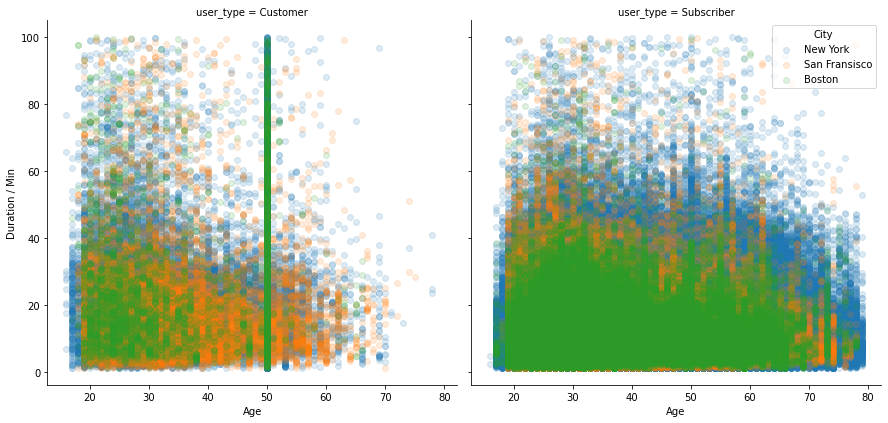

In [118]:
# let's display the relation between duration, age, user type, city feature
# create faceted heat maps on the user type variable
graph = sb.FacetGrid(data = df_clean_time_age_limit, col = 'user_type', hue='city', hue_order=['New York','San Fransisco','Boston'],col_wrap = 6, size = 6)
graph.map(plt.scatter, 'member_age', 'duration_min', alpha=0.15)
graph.set_xlabels('Age')
graph.set_ylabels('Duration / Min')
plt.legend(title="City")
plt.show()

> The graph shows that the subscribers are older and it also shows that the jump in the age-duration graph are mainly from customer in boston city.

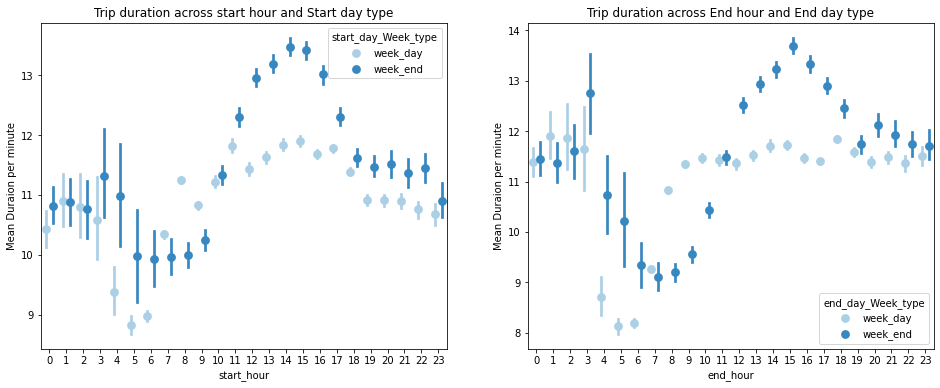

In [119]:
#Lets display the relation between duration with start-end hour with start-end day week type 
fig = plt.figure(figsize = [16,6])

# subplot 1: display duration along with start_hour, start_day_Week_type
plt.subplot(1, 2, 1)
ax = sb.pointplot(data = df_clean_time_age_limit, x = 'start_hour', y = 'duration_min', hue = 'start_day_Week_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip duration across start hour and Start day type')
plt.ylabel('Mean Duraion per minute')
ax.set_yticklabels([],minor = True)


# subplot 1: display duration along with end_hour, end_day_Week_type
plt.subplot(1, 2, 2)
ax = sb.pointplot(data = df_clean_time_age_limit, x = 'end_hour', y = 'duration_min', hue = 'end_day_Week_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip duration across End hour and End day type')
plt.ylabel('Mean Duraion per minute')
ax.set_yticklabels([],minor = True)

plt.show();

> At week end days people spend more time in trips than the week days with peak hour around 3 PM with trip duration value around 14 minutes.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Features ( Gender vs Duration vs User Type): The female customers spend more time in the trip than female subscribers and the same for males.

> Features ( City vs Duration vs User Type):  The Customers in New York spend more time than the customers in Boston than the customers in San Fransisco, but for the subscribers the duration is almost the same for all members regardless the city.

> Features ( Gender vs Duration vs City): The female in Boston spend more time in the trip than in New York than in San Fransisco and the same for males.

> Features ( Gender vs Age vs User Type): The Male subscriber are older than the Male customer and the same for female.

> Features ( City vs Age vs User Type): Customers in New York are older than Subscriber in New York, and so on for other cities. 

> Features ( Gender vs Age vs City): Males are older than female and the city didn't affect that.

> Features ( Hour vs Duration vs Day type): At week end days people spend more time in trips than the week days with peak hour around 3 PM with trip duration value around 14 minutes.

### Were there any interesting or surprising interactions between features?

> The jump in the age-duration graph are mainly from customers with gender other in boston city.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

### Resources:
#### Data Gatharing:
  
#### 1.https://www.bikeshare.com/data/
#### 2.https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-Share-Data-Systems
#### 3.https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv
#### 4.https://www.citibikenyc.com/system-data
#### 5.https://s3.amazonaws.com/tripdata/index.html
#### 6.https://www.bluebikes.com/system-data
#### 7.https://s3.amazonaws.com/hubway-data/index.html